<a href="https://colab.research.google.com/github/joan-chep/GROUP_2_PROJECT_CORE/blob/main/Copy_of_Copy_of_A_GROUP_2_PROJECT_ON_THE_ANALYSIS_OF_GLOBAL_ECONOMIC_RECESSION_(2020).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.0 Defining the question.

**Introduction**


A global recession is an extended period of economic decline around the world. A global recession involves more or less synchronized recessions across many national economies, as trade relations and international financial systems transmit economic shocks and the impact of recession from one country to another.
The International Monetary Fund (IMF) uses a broad set of criteria to identify global recessions, including a decrease in per capita gross domestic product (GDP) worldwide. According to the IMF’s definition, this drop in global output must coincide with a weakening of other macroeconomic indicators, such as trade, capital flows, and employment.

1.1.1 Specifying the question

To identify Gross domestic product across the countries globally

# 1.1 Defining the metrics of success


This analysis requires us to come up with a solution that will help provide insights on how to improve the Gross Domestic Product, therefore improving the economy.
We therefore need to identify the metrics that are significant in determining this and assess the key factors that influence the GDP and offer insights. We will implement the solution by performing basic analysis.


# 1.3 Understanding the context

In this project we will seek to determine the Gross Domestic Product of different countries
As data scientists we will perform analysis to determine the factors that influence Gross Domestic Product
Then perform hypothesis testing with regards to the claim that we will have made.

# 1.4  Recording the Experimental Design

1 Exploratory Data Analysis

2 Data Cleaning

3 Univariate, Bivariate Analysis

4 Visualizations

5 Testing a Hypothesis

6 Challenge our solution by providing insights on how we can make improvements

# Importing Libraries.

In [ ]:
# Importing Pandas
import pandas as pd

# Importing Numpy
import numpy as np

# Importing Seaborn
import seaborn as sns

# Importing Matplotlib
import matplotlib.pyplot as plt

# Importing Stats
from scipy import stats

# Importing statsmodels
import statsmodels.api as sm 

# Importing pylab 
import pylab as py

# Importing math
import math as m

# Importing the Norm
from scipy.stats import norm
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Loading the dataset

In [ ]:
# Loading the dataset

wb_df = pd.read_csv('/content/archive (8) (1).zip')
wb_df.head()

,country,Region,Adults (ages 15+) and children (ages 0-14) newly infected with HIV,Adults (ages 15-49) newly infected with HIV,Age dependency ratio (% of working-age population),"Age dependency ratio, old (% of working-age population)","Age dependency ratio, young (% of working-age population)",Arms exports (SIPRI trend indicator values),Arms imports (SIPRI trend indicator values),"Automated teller machines (ATMs) (per 100,000 adults)",Average transaction cost of sending remittances from a specific country (%),Average transaction cost of sending remittances to a specific country (%),Bank capital to assets ratio (%),Bank liquid reserves to bank assets ratio (%),Bank nonperforming loans to total gross loans (%),"Charges for the use of intellectual property, payments (BoP, current US$)","Charges for the use of intellectual property, receipts (BoP, current US$)","Commercial bank branches (per 100,000 adults)","Computer, communications and other services (% of commercial service exports)","Computer, communications and other services (% of commercial service imports)",Consumer price index (2010 = 100),Domestic credit provided by financial sector (% of GDP),Domestic credit to private sector (% of GDP),Domestic credit to private sector by banks (% of GDP),"Employment to population ratio, 15+, female (%) (national estimate)","Employment to population ratio, 15+, male (%) (national estimate)","Employment to population ratio, 15+, total (%) (national estimate)","Employment to population ratio, ages 15-24, female (%) (national estimate)","Employment to population ratio, ages 15-24, male (%) (national estimate)","Employment to population ratio, ages 15-24, total (%) (national estimate)",Final consumption expenditure (% of GDP),Final consumption expenditure (annual % growth),Final consumption expenditure (constant 2010 US$),Final consumption expenditure (constant LCU),Final consumption expenditure (current LCU),Final consumption expenditure (current US$),Fixed broadband subscriptions,Fixed broadband subscriptions (per 100 people),Fixed telephone subscriptions,Fixed telephone subscriptions (per 100 people),GDP (constant 2010 US$),GDP growth (annual %),GDP per capita (constant 2010 US$),GNI (constant 2010 US$),GNI growth (annual %),GNI per capita (constant 2010 US$),High-technology exports (current US$),Human capital index (HCI) (scale 0-1),Individuals using the Internet (% of population),"Labor force, total",Military expenditure (% of GDP),Population density (people per sq. km of land area),Population growth (annual %),"Population, female","Population, male","Population, total",Ratio of female to male labor force participation rate (%) (national estimate),"Total reserves (includes gold, current US$)","Unemployment, total (% of total labor force) (modeled ILO estimate)",Urban population,Women Business and the Law Index Score (scale 1-100)
0,Algeria,NorthernAfrica,1700.0,1400.0,60.067725,10.793250,49.274474,NaN,5.490000e+08,NaN,NaN,10.519145,NaN,14.572593,NaN,NaN,NaN,NaN,NaN,NaN,155.017250,NaN,29.644683,29.629751,NaN,NaN,NaN,NaN,NaN,NaN,66.220612,-3.199239,1.092990e+11,9.996650e+12,1.218690e+13,9.612842e+10,3790459.0,8.643942,4784306.0,10.910358,1.913110e+11,-5.480992,4362.739536,1.875860e+11,-5.201186,4277.795776,NaN,0.534556,NaN,12231916,6.659994,18.411340,1.836534,21697235,22153808,43851043,NaN,5.943439e+10,12.83,32332690,57.500
1,Argentina,SouthAmerica,5600.0,5000.0,55.767661,17.705349,38.062312,NaN,7.000000e+06,62.451861,NaN,NaN,15.452708,NaN,3.860953,1.259954e+09,2.141864e+08,13.21,66.675183,57.566180,NaN,NaN,NaN,NaN,41.02,59.240002,49.599998,17.93,28.23,23.110001,79.777523,-11.709644,3.256970e+11,5.191880e+11,2.155690e+13,3.056010e+11,9571562.0,21.178002,7356165.0,16.276223,3.944470e+11,-9.905235,8692.708046,3.836430e+11,-8.546426,8454.617014,5.464458e+08,0.602145,NaN,19191447,0.761487,16.580893,0.970054,23239321,22137442,45376763,NaN,3.940373e+10,11.67,41796990,76.250
2,Australia,Oceania,750.0,1000.0,55.051941,25.138662,29.913279,39600

# Data Preparation and Exploration

In [ ]:
# Checking the last five rows.

wb_df.tail()

,country,Region,Adults (ages 15+) and children (ages 0-14) newly infected with HIV,Adults (ages 15-49) newly infected with HIV,Age dependency ratio (% of working-age population),"Age dependency ratio, old (% of working-age population)","Age dependency ratio, young (% of working-age population)",Arms exports (SIPRI trend indicator values),Arms imports (SIPRI trend indicator values),"Automated teller machines (ATMs) (per 100,000 adults)",Average transaction cost of sending remittances from a specific country (%),Average transaction cost of sending remittances to a specific country (%),Bank capital to assets ratio (%),Bank liquid reserves to bank assets ratio (%),Bank nonperforming loans to total gross loans (%),"Charges for the use of intellectual property, payments (BoP, current US$)","Charges for the use of intellectual property, receipts (BoP, current US$)","Commercial bank branches (per 100,000 adults)","Computer, communications and other services (% of commercial service exports)","Computer, communications and other services (% of commercial service imports)",Consumer price index (2010 = 100),Domestic credit provided by financial sector (% of GDP),Domestic credit to private sector (% of GDP),Domestic credit to private sector by banks (% of GDP),"Employment to population ratio, 15+, female (%) (national estimate)","Employment to population ratio, 15+, male (%) (national estimate)","Employment to population ratio, 15+, total (%) (national estimate)","Employment to population ratio, ages 15-24, female (%) (national estimate)","Employment to population ratio, ages 15-24, male (%) (national estimate)","Employment to population ratio, ages 15-24, total (%) (national estimate)",Final consumption expenditure (% of GDP),Final consumption expenditure (annual % growth),Final consumption expenditure (constant 2010 US$),Final consumption expenditure (constant LCU),Final consumption expenditure (current LCU),Final consumption expenditure (current US$),Fixed broadband subscriptions,Fixed broadband subscriptions (per 100 people),Fixed telephone subscriptions,Fixed telephone subscriptions (per 100 people),GDP (constant 2010 US$),GDP growth (annual %),GDP per capita (constant 2010 US$),GNI (constant 2010 US$),GNI growth (annual %),GNI per capita (constant 2010 US$),High-technology exports (current US$),Human capital index (HCI) (scale 0-1),Individuals using the Internet (% of population),"Labor force, total",Military expenditure (% of GDP),Population density (people per sq. km of land area),Population growth (annual %),"Population, female","Population, male","Population, total",Ratio of female to male labor force participation rate (%) (national estimate),"Total reserves (includes gold, current US$)","Unemployment, total (% of total labor force) (modeled ILO estimate)",Urban population,Women Business and the Law Index Score (scale 1-100)
52,Uganda,EasternAfrica,38000.0,31000.0,92.313546,3.818770,88.494776,NaN,13000000.0,NaN,NaN,10.905730,13.371706,22.420628,5.215868,NaN,NaN,NaN,NaN,NaN,180.468679,27.180267,14.348209,13.106208,NaN,NaN,NaN,NaN,NaN,NaN,81.018546,3.406432,3.648631e+10,1.034600e+14,1.124870e+14,3.027828e+10,34596.0,0.075635,90774.0,0.198452,4.382869e+10,2.857581,958.192698,4.308369e+10,3.873808,941.905324,1.177166e+07,0.384177,NaN,16514595,2.597145,228.111909,3.269713,23194411,22546589,45741000,NaN,NaN,2.44,11414209,73.125
53,Ukraine,EasternEurope,9300.0,8500.0,49.119436,25.274466,23.844970,1.150000e+08,18000000.0,93.739228,NaN,6.367748,11.658462,20.781186,41.004096,4.950000e+08,7.400000e+07,0.41,63.544404,28.160689,289.354895,NaN,NaN,21.017891,NaN,NaN,NaN,NaN,NaN,NaN,93.540953,0.483386,1.414520e+11,2.496460e+12,3.923200e+12,1.455330e+11,7769401.0,18.617013,3314263.0,7.941626,1.300730e+11,-4.020318,3115.860766,1.321130e+11,-5.375085,3164.730820,1.248168e+09,0.631387,NaN,19461889,4.129198,76.173098,-0.568252,23685780,20448913,44134693,NaN,2.913754e+10,9.48,30721277,79.375
54,United Arab Emirates,WesternAsia,100.0,100.0,19.158962,1

In [ ]:
# Checking the columns

wb_df.columns

Index(['country', 'Region',
       'Adults (ages 15+) and children (ages 0-14) newly infected with HIV',
       'Adults (ages 15-49) newly infected with HIV',
       'Age dependency ratio (% of working-age population)',
       'Age dependency ratio, old (% of working-age population)',
       'Age dependency ratio, young (% of working-age population)',
       'Arms exports (SIPRI trend indicator values)',
       'Arms imports (SIPRI trend indicator values)',
       'Automated teller machines (ATMs) (per 100,000 adults)',
       'Average transaction cost of sending remittances from a specific country (%)',
       'Average transaction cost of sending remittances to a specific country (%)',
       'Bank capital to assets ratio (%)',
       'Bank liquid reserves to bank assets ratio (%)',
       'Bank nonperforming loans to total gross loans (%)',
       'Charges for the use of intellectual property, payments (BoP, current US$)',
       'Charges for the use of intellectual property, receipt

In [ ]:
# Checking the size of the dataset

wb_df.shape

(57, 61)

In [ ]:
# Checking the datatypes

wb_df.dtypes

country                                                                            object
Region                                                                             object
Adults (ages 15+) and children (ages 0-14) newly infected with HIV                float64
Adults (ages 15-49) newly infected with HIV                                       float64
Age dependency ratio (% of working-age population)                                float64
                                                                                   ...   
Ratio of female to male labor force participation rate (%) (national estimate)    float64
Total reserves (includes gold, current US$)                                       float64
Unemployment, total (% of total labor force) (modeled ILO estimate)               float64
Urban population                                                                    int64
Women Business and the Law Index Score (scale 1-100)                              float64
Length: 61

In [ ]:
# Checking if there are any null values

wb_df.isnull().sum().sum()

671

From our observation there are 671 null values in our dataset.

In [ ]:
# Removing spaces in the columns names

wb_df.columns = wb_df.columns.str.lower().str.replace(" ", "")

In [ ]:
wb_df.head()

,country,region,adults(ages15+)andchildren(ages0-14)newlyinfectedwithhiv,adults(ages15-49)newlyinfectedwithhiv,agedependencyratio(%ofworking-agepopulation),"agedependencyratio,old(%ofworking-agepopulation)","agedependencyratio,young(%ofworking-agepopulation)",armsexports(sipritrendindicatorvalues),armsimports(sipritrendindicatorvalues),"automatedtellermachines(atms)(per100,000adults)",averagetransactioncostofsendingremittancesfromaspecificcountry(%),averagetransactioncostofsendingremittancestoaspecificcountry(%),bankcapitaltoassetsratio(%),bankliquidreservestobankassetsratio(%),banknonperformingloanstototalgrossloans(%),"chargesfortheuseofintellectualproperty,payments(bop,currentus$)","chargesfortheuseofintellectualproperty,receipts(bop,currentus$)","commercialbankbranches(per100,000adults)","computer,communicationsandotherservices(%ofcommercialserviceexports)","computer,communicationsandotherservices(%ofcommercialserviceimports)",consumerpriceindex(2010=100),domesticcreditprovidedbyfinancialsector(%ofgdp),domesticcredittoprivatesector(%ofgdp),domesticcredittoprivatesectorbybanks(%ofgdp),"employmenttopopulationratio,15+,female(%)(nationalestimate)","employmenttopopulationratio,15+,male(%)(nationalestimate)","employmenttopopulationratio,15+,total(%)(nationalestimate)","employmenttopopulationratio,ages15-24,female(%)(nationalestimate)","employmenttopopulationratio,ages15-24,male(%)(nationalestimate)","employmenttopopulationratio,ages15-24,total(%)(nationalestimate)",finalconsumptionexpenditure(%ofgdp),finalconsumptionexpenditure(annual%growth),finalconsumptionexpenditure(constant2010us$),finalconsumptionexpenditure(constantlcu),finalconsumptionexpenditure(currentlcu),finalconsumptionexpenditure(currentus$),fixedbroadbandsubscriptions,fixedbroadbandsubscriptions(per100people),fixedtelephonesubscriptions,fixedtelephonesubscriptions(per100people),gdp(constant2010us$),gdpgrowth(annual%),gdppercapita(constant2010us$),gni(constant2010us$),gnigrowth(annual%),gnipercapita(constant2010us$),high-technologyexports(currentus$),humancapitalindex(hci)(scale0-1),individualsusingtheinternet(%ofpopulation),"laborforce,total",militaryexpenditure(%ofgdp),populationdensity(peoplepersq.kmoflandarea),populationgrowth(annual%),"population,female","population,male","population,total",ratiooffemaletomalelaborforceparticipationrate(%)(nationalestimate),"totalreserves(includesgold,currentus$)","unemployment,total(%oftotallaborforce)(modelediloestimate)",urbanpopulation,womenbusinessandthelawindexscore(scale1-100)
0,Algeria,NorthernAfrica,1700.0,1400.0,60.067725,10.793250,49.274474,NaN,5.490000e+08,NaN,NaN,10.519145,NaN,14.572593,NaN,NaN,NaN,NaN,NaN,NaN,155.017250,NaN,29.644683,29.629751,NaN,NaN,NaN,NaN,NaN,NaN,66.220612,-3.199239,1.092990e+11,9.996650e+12,1.218690e+13,9.612842e+10,3790459.0,8.643942,4784306.0,10.910358,1.913110e+11,-5.480992,4362.739536,1.875860e+11,-5.201186,4277.795776,NaN,0.534556,NaN,12231916,6.659994,18.411340,1.836534,21697235,22153808,43851043,NaN,5.943439e+10,12.83,32332690,57.500
1,Argentina,SouthAmerica,5600.0,5000.0,55.767661,17.705349,38.062312,NaN,7.000000e+06,62.451861,NaN,NaN,15.452708,NaN,3.860953,1.259954e+09,2.141864e+08,13.21,66.675183,57.566180,NaN,NaN,NaN,NaN,41.02,59.240002,49.599998,17.93,28.23,23.110001,79.777523,-11.709644,3.256970e+11,5.191880e+11,2.155690e+13,3.056010e+11,9571562.0,21.178002,7356165.0,16.276223,3.944470e+11,-9.905235,8692.708046,3.836430e+11,-8.546426,8454.617014,5.464458e+08,0.602145,NaN,19191447,0.761487,16.580893,0.970054,23239321,22137442,45376763,NaN,3.940373e+10,11.67,41796990,76.250
2,Australia,Oceania,750.0,1000.0,55.051941,25.138662,29.913279,396000000.0,1.658000e+09,129.692233,7.214873,NaN,7.998032,4.253643,1.107783,3.422638e+09,8.463610e+08,25.43,32.243937,51.335948,120.811654,NaN,141.959405,141.959405,56.39,65.450000,60.830002,57.72,55.85,56.760000,73.926307,-0.524927,1.078140e+12,1.443060e+12,1.467760e+12,9.838860e+11,8937550.0,35.049375,6200000.0,24.313836,1.446370e+12,-0.284839,56

In [ ]:
wb_df.rename({'averagetransactioncostofsendingremittancestoaspecificcountry(%)' : 'Average_transaction_cost'}, axis = 1, inplace = True)
wb_df.head()

,country,region,adults(ages15+)andchildren(ages0-14)newlyinfectedwithhiv,adults(ages15-49)newlyinfectedwithhiv,agedependencyratio(%ofworking-agepopulation),"agedependencyratio,old(%ofworking-agepopulation)","agedependencyratio,young(%ofworking-agepopulation)",armsexports(sipritrendindicatorvalues),armsimports(sipritrendindicatorvalues),"automatedtellermachines(atms)(per100,000adults)",averagetransactioncostofsendingremittancesfromaspecificcountry(%),Average_transaction_cost,bankcapitaltoassetsratio(%),bankliquidreservestobankassetsratio(%),banknonperformingloanstototalgrossloans(%),"chargesfortheuseofintellectualproperty,payments(bop,currentus$)","chargesfortheuseofintellectualproperty,receipts(bop,currentus$)","commercialbankbranches(per100,000adults)","computer,communicationsandotherservices(%ofcommercialserviceexports)","computer,communicationsandotherservices(%ofcommercialserviceimports)",consumerpriceindex(2010=100),domesticcreditprovidedbyfinancialsector(%ofgdp),domesticcredittoprivatesector(%ofgdp),domesticcredittoprivatesectorbybanks(%ofgdp),"employmenttopopulationratio,15+,female(%)(nationalestimate)","employmenttopopulationratio,15+,male(%)(nationalestimate)","employmenttopopulationratio,15+,total(%)(nationalestimate)","employmenttopopulationratio,ages15-24,female(%)(nationalestimate)","employmenttopopulationratio,ages15-24,male(%)(nationalestimate)","employmenttopopulationratio,ages15-24,total(%)(nationalestimate)",finalconsumptionexpenditure(%ofgdp),finalconsumptionexpenditure(annual%growth),finalconsumptionexpenditure(constant2010us$),finalconsumptionexpenditure(constantlcu),finalconsumptionexpenditure(currentlcu),finalconsumptionexpenditure(currentus$),fixedbroadbandsubscriptions,fixedbroadbandsubscriptions(per100people),fixedtelephonesubscriptions,fixedtelephonesubscriptions(per100people),gdp(constant2010us$),gdpgrowth(annual%),gdppercapita(constant2010us$),gni(constant2010us$),gnigrowth(annual%),gnipercapita(constant2010us$),high-technologyexports(currentus$),humancapitalindex(hci)(scale0-1),individualsusingtheinternet(%ofpopulation),"laborforce,total",militaryexpenditure(%ofgdp),populationdensity(peoplepersq.kmoflandarea),populationgrowth(annual%),"population,female","population,male","population,total",ratiooffemaletomalelaborforceparticipationrate(%)(nationalestimate),"totalreserves(includesgold,currentus$)","unemployment,total(%oftotallaborforce)(modelediloestimate)",urbanpopulation,womenbusinessandthelawindexscore(scale1-100)
0,Algeria,NorthernAfrica,1700.0,1400.0,60.067725,10.793250,49.274474,NaN,5.490000e+08,NaN,NaN,10.519145,NaN,14.572593,NaN,NaN,NaN,NaN,NaN,NaN,155.017250,NaN,29.644683,29.629751,NaN,NaN,NaN,NaN,NaN,NaN,66.220612,-3.199239,1.092990e+11,9.996650e+12,1.218690e+13,9.612842e+10,3790459.0,8.643942,4784306.0,10.910358,1.913110e+11,-5.480992,4362.739536,1.875860e+11,-5.201186,4277.795776,NaN,0.534556,NaN,12231916,6.659994,18.411340,1.836534,21697235,22153808,43851043,NaN,5.943439e+10,12.83,32332690,57.500
1,Argentina,SouthAmerica,5600.0,5000.0,55.767661,17.705349,38.062312,NaN,7.000000e+06,62.451861,NaN,NaN,15.452708,NaN,3.860953,1.259954e+09,2.141864e+08,13.21,66.675183,57.566180,NaN,NaN,NaN,NaN,41.02,59.240002,49.599998,17.93,28.23,23.110001,79.777523,-11.709644,3.256970e+11,5.191880e+11,2.155690e+13,3.056010e+11,9571562.0,21.178002,7356165.0,16.276223,3.944470e+11,-9.905235,8692.708046,3.836430e+11,-8.546426,8454.617014,5.464458e+08,0.602145,NaN,19191447,0.761487,16.580893,0.970054,23239321,22137442,45376763,NaN,3.940373e+10,11.67,41796990,76.250
2,Australia,Oceania,750.0,1000.0,55.051941,25.138662,29.913279,396000000.0,1.658000e+09,129.692233,7.214873,NaN,7.998032,4.253643,1.107783,3.422638e+09,8.463610e+08,25.43,32.243937,51.335948,120.811654,NaN,141.959405,141.959405,56.39,65.450000,60.830002,57.72,55.85,56.760000,73.926307,-0.524927,1.078140e+12,1.443060e+12,1.467760e+12,9.838860e+11,8937550.0,35.049375,6200000.0,24.313836,1.446370e+12,-0.284839,56307.280680,NaN,NaN,NaN,5.709108e+09,0.7

In [ ]:
# Renaming some columns in the dataset
wb_df.rename({'adults(ages15+)andchildren(ages0-14)newlyinfectedwithhiv' : 'Adultchildren_newly_Hiv', 'adults(ages15-49)newlyinfectedwithhiv' : 'Adults15-49newly_affected', 'agedependencyratio(%ofworking-agepopulation)' : 'Age_dependency', 'agedependencyratio,old(%ofworking-agepopulation)' : 'Age_dependency_old', 'agedependencyratio,young(%ofworking-agepopulation)' : 'Age_dependency_Young', 'automatedtellermachines(ATMs)(per 100,000 adults)' : 'ATM', 'armsexports(sipritrendindicatorvalues)' : 'Arms_exports', 'armsimports(sipritrendindicatorvalues)' : 'Arms_inputs', 'averagetransactioncostofsendingremittancesfromaspecificcountry(%)' : 'Average_remittances'}, axis = 1, inplace = True)
wb_df.head()

,country,region,Adultchildren_newly_Hiv,Adults15-49newly_affected,Age_dependency,Age_dependency_old,Age_dependency_Young,Arms_exports,Arms_inputs,"automatedtellermachines(atms)(per100,000adults)",Average_remittances,Average_transaction_cost,bankcapitaltoassetsratio(%),bankliquidreservestobankassetsratio(%),banknonperformingloanstototalgrossloans(%),"chargesfortheuseofintellectualproperty,payments(bop,currentus$)","chargesfortheuseofintellectualproperty,receipts(bop,currentus$)","commercialbankbranches(per100,000adults)","computer,communicationsandotherservices(%ofcommercialserviceexports)","computer,communicationsandotherservices(%ofcommercialserviceimports)",consumerpriceindex(2010=100),domesticcreditprovidedbyfinancialsector(%ofgdp),domesticcredittoprivatesector(%ofgdp),domesticcredittoprivatesectorbybanks(%ofgdp),"employmenttopopulationratio,15+,female(%)(nationalestimate)","employmenttopopulationratio,15+,male(%)(nationalestimate)","employmenttopopulationratio,15+,total(%)(nationalestimate)","employmenttopopulationratio,ages15-24,female(%)(nationalestimate)","employmenttopopulationratio,ages15-24,male(%)(nationalestimate)","employmenttopopulationratio,ages15-24,total(%)(nationalestimate)",finalconsumptionexpenditure(%ofgdp),finalconsumptionexpenditure(annual%growth),finalconsumptionexpenditure(constant2010us$),finalconsumptionexpenditure(constantlcu),finalconsumptionexpenditure(currentlcu),finalconsumptionexpenditure(currentus$),fixedbroadbandsubscriptions,fixedbroadbandsubscriptions(per100people),fixedtelephonesubscriptions,fixedtelephonesubscriptions(per100people),gdp(constant2010us$),gdpgrowth(annual%),gdppercapita(constant2010us$),gni(constant2010us$),gnigrowth(annual%),gnipercapita(constant2010us$),high-technologyexports(currentus$),humancapitalindex(hci)(scale0-1),individualsusingtheinternet(%ofpopulation),"laborforce,total",militaryexpenditure(%ofgdp),populationdensity(peoplepersq.kmoflandarea),populationgrowth(annual%),"population,female","population,male","population,total",ratiooffemaletomalelaborforceparticipationrate(%)(nationalestimate),"totalreserves(includesgold,currentus$)","unemployment,total(%oftotallaborforce)(modelediloestimate)",urbanpopulation,womenbusinessandthelawindexscore(scale1-100)
0,Algeria,NorthernAfrica,1700.0,1400.0,60.067725,10.793250,49.274474,NaN,5.490000e+08,NaN,NaN,10.519145,NaN,14.572593,NaN,NaN,NaN,NaN,NaN,NaN,155.017250,NaN,29.644683,29.629751,NaN,NaN,NaN,NaN,NaN,NaN,66.220612,-3.199239,1.092990e+11,9.996650e+12,1.218690e+13,9.612842e+10,3790459.0,8.643942,4784306.0,10.910358,1.913110e+11,-5.480992,4362.739536,1.875860e+11,-5.201186,4277.795776,NaN,0.534556,NaN,12231916,6.659994,18.411340,1.836534,21697235,22153808,43851043,NaN,5.943439e+10,12.83,32332690,57.500
1,Argentina,SouthAmerica,5600.0,5000.0,55.767661,17.705349,38.062312,NaN,7.000000e+06,62.451861,NaN,NaN,15.452708,NaN,3.860953,1.259954e+09,2.141864e+08,13.21,66.675183,57.566180,NaN,NaN,NaN,NaN,41.02,59.240002,49.599998,17.93,28.23,23.110001,79.777523,-11.709644,3.256970e+11,5.191880e+11,2.155690e+13,3.056010e+11,9571562.0,21.178002,7356165.0,16.276223,3.944470e+11,-9.905235,8692.708046,3.836430e+11,-8.546426,8454.617014,5.464458e+08,0.602145,NaN,19191447,0.761487,16.580893,0.970054,23239321,22137442,45376763,NaN,3.940373e+10,11.67,41796990,76.250
2,Australia,Oceania,750.0,1000.0,55.051941,25.138662,29.913279,396000000.0,1.658000e+09,129.692233,7.214873,NaN,7.998032,4.253643,1.107783,3.422638e+09,8.463610e+08,25.43,32.243937,51.335948,120.811654,NaN,141.959405,141.959405,56.39,65.450000,60.830002,57.72,55.85,56.760000,73.926307,-0.524927,1.078140e+12,1.443060e+12,1.467760e+12,9.838860e+11,8937550.0,35.049375,6200000.0,24.313836,1.446370e+12,-0.284839,56307.280680,NaN,NaN,NaN,5.709108e+09,0.770240,NaN,13452598,2.063043,3.339440,1.258698,12895213,12791828,25687041,85.979440,4.301263e+10,6.61,22152761,96.875
3,Austria,WesternEurope,NaN,NaN,50.639108,28.928737,21.710371,9000000.0,1.300000e+07,167.949809,6.366444,NaN,NaN,NaN,NaN,

In [ ]:
# Filling Null values with mean of Age dependency column
x = wb_df["Age_dependency"].mean()
wb_df["Age_dependency"].fillna(x, inplace = True)
print(wb_df)
y = wb_df["Average_transaction_cost"].mean()
wb_df["Average_transaction_cost"].fillna(y, inplace = True)
print(wb_df)
z = wb_df["Adults15-49newly_affected"].mean()
wb_df["Adults15-49newly_affected"].fillna(z, inplace = True)
print(wb_df)
a = wb_df["Arms_exports"].mean()
wb_df["Arms_exports"].fillna(a, inplace = True)
print(wb_df)
b = wb_df["Average_remittances"].mean()
wb_df["Average_remittances"].fillna(b, inplace = True)
print(wb_df)
c = wb_df["Average_transaction_cost"].mean()
wb_df["Average_transaction_cost"].fillna(c, inplace = True)
print(wb_df)

                     country  ... womenbusinessandthelawindexscore(scale1-100)
0                    Algeria  ...                                       57.500
1                  Argentina  ...                                       76.250
2                  Australia  ...                                       96.875
3                    Austria  ...                                       96.875
4                 Bangladesh  ...                                       49.375
5                    Belarus  ...                                       75.625
6                    Belgium  ...                                      100.000
7                     Brazil  ...                                       85.000
8                     Canada  ...                                      100.000
9                      Chile  ...                                       80.000
10                     China  ...                                       75.625
11                  Colombia  ...                   

We replaced our null values with the mean.This is because it was appropriate as compared to other central tendancies.

In [ ]:
#  Confirming columns details
wb_df.head()

,country,region,Adultchildren_newly_Hiv,Adults15-49newly_affected,Age_dependency,Age_dependency_old,Age_dependency_Young,Arms_exports,Arms_inputs,"automatedtellermachines(atms)(per100,000adults)",Average_remittances,Average_transaction_cost,bankcapitaltoassetsratio(%),bankliquidreservestobankassetsratio(%),banknonperformingloanstototalgrossloans(%),"chargesfortheuseofintellectualproperty,payments(bop,currentus$)","chargesfortheuseofintellectualproperty,receipts(bop,currentus$)","commercialbankbranches(per100,000adults)","computer,communicationsandotherservices(%ofcommercialserviceexports)","computer,communicationsandotherservices(%ofcommercialserviceimports)",consumerpriceindex(2010=100),domesticcreditprovidedbyfinancialsector(%ofgdp),domesticcredittoprivatesector(%ofgdp),domesticcredittoprivatesectorbybanks(%ofgdp),"employmenttopopulationratio,15+,female(%)(nationalestimate)","employmenttopopulationratio,15+,male(%)(nationalestimate)","employmenttopopulationratio,15+,total(%)(nationalestimate)","employmenttopopulationratio,ages15-24,female(%)(nationalestimate)","employmenttopopulationratio,ages15-24,male(%)(nationalestimate)","employmenttopopulationratio,ages15-24,total(%)(nationalestimate)",finalconsumptionexpenditure(%ofgdp),finalconsumptionexpenditure(annual%growth),finalconsumptionexpenditure(constant2010us$),finalconsumptionexpenditure(constantlcu),finalconsumptionexpenditure(currentlcu),finalconsumptionexpenditure(currentus$),fixedbroadbandsubscriptions,fixedbroadbandsubscriptions(per100people),fixedtelephonesubscriptions,fixedtelephonesubscriptions(per100people),gdp(constant2010us$),gdpgrowth(annual%),gdppercapita(constant2010us$),gni(constant2010us$),gnigrowth(annual%),gnipercapita(constant2010us$),high-technologyexports(currentus$),humancapitalindex(hci)(scale0-1),individualsusingtheinternet(%ofpopulation),"laborforce,total",militaryexpenditure(%ofgdp),populationdensity(peoplepersq.kmoflandarea),populationgrowth(annual%),"population,female","population,male","population,total",ratiooffemaletomalelaborforceparticipationrate(%)(nationalestimate),"totalreserves(includesgold,currentus$)","unemployment,total(%oftotallaborforce)(modelediloestimate)",urbanpopulation,womenbusinessandthelawindexscore(scale1-100)
0,Algeria,NorthernAfrica,1700.0,1400.00000,60.067725,10.793250,49.274474,7.039231e+08,5.490000e+08,NaN,8.053924,10.519145,NaN,14.572593,NaN,NaN,NaN,NaN,NaN,NaN,155.017250,NaN,29.644683,29.629751,NaN,NaN,NaN,NaN,NaN,NaN,66.220612,-3.199239,1.092990e+11,9.996650e+12,1.218690e+13,9.612842e+10,3790459.0,8.643942,4784306.0,10.910358,1.913110e+11,-5.480992,4362.739536,1.875860e+11,-5.201186,4277.795776,NaN,0.534556,NaN,12231916,6.659994,18.411340,1.836534,21697235,22153808,43851043,NaN,5.943439e+10,12.83,32332690,57.500
1,Argentina,SouthAmerica,5600.0,5000.00000,55.767661,17.705349,38.062312,7.039231e+08,7.000000e+06,62.451861,8.053924,6.045787,15.452708,NaN,3.860953,1.259954e+09,2.141864e+08,13.21,66.675183,57.566180,NaN,NaN,NaN,NaN,41.02,59.240002,49.599998,17.93,28.23,23.110001,79.777523,-11.709644,3.256970e+11,5.191880e+11,2.155690e+13,3.056010e+11,9571562.0,21.178002,7356165.0,16.276223,3.944470e+11,-9.905235,8692.708046,3.836430e+11,-8.546426,8454.617014,5.464458e+08,0.602145,NaN,19191447,0.761487,16.580893,0.970054,23239321,22137442,45376763,NaN,3.940373e+10,11.67,41796990,76.250
2,Australia,Oceania,750.0,1000.00000,55.051941,25.138662,29.913279,3.960000e+08,1.658000e+09,129.692233,7.214873,6.045787,7.998032,4.253643,1.107783,3.422638e+09,8.463610e+08,25.43,32.243937,51.335948,120.811654,NaN,141.959405,141.959405,56.39,65.450000,60.830002,57.72,55.85,56.760000,73.926307,-0.524927,1.078140e+12,1.443060e+12,1.467760e+12,9.838860e+11,8937550.0,35.049375,6200000.0,24.313836,1.446370e+12,-0.284839,56307.280680,NaN,NaN,NaN,5.709108e+09,0.770240,NaN,13452598,2.063043,3.339440,1.258698,12895213,12791828,25687041,85.979440,4.301263e+10,6.61,22152761,96.875
3,Austria,WesternEurope,NaN,11840.47619,50.639108,28.928737,21.710371,

In [ ]:
wb_df.shape

(57, 61)

Our dataset has 57 rows and 61 columns.

In [ ]:
# Checking for any duplicates

wb_df.duplicated().sum()


0

There are no duplicates in this dataset

In [ ]:
wb_df.rename({'	gdpgrowth(annual%)' : 'GDP_annual'}, axis = 1, inplace = True)

In [ ]:
# Checking statistical information.

wb_df.describe()

,Adultchildren_newly_Hiv,Adults15-49newly_affected,Age_dependency,Age_dependency_old,Age_dependency_Young,Arms_exports,Arms_inputs,"automatedtellermachines(atms)(per100,000adults)",Average_remittances,Average_transaction_cost,bankcapitaltoassetsratio(%),bankliquidreservestobankassetsratio(%),banknonperformingloanstototalgrossloans(%),"chargesfortheuseofintellectualproperty,payments(bop,currentus$)","chargesfortheuseofintellectualproperty,receipts(bop,currentus$)","commercialbankbranches(per100,000adults)","computer,communicationsandotherservices(%ofcommercialserviceexports)","computer,communicationsandotherservices(%ofcommercialserviceimports)",consumerpriceindex(2010=100),domesticcreditprovidedbyfinancialsector(%ofgdp),domesticcredittoprivatesector(%ofgdp),domesticcredittoprivatesectorbybanks(%ofgdp),"employmenttopopulationratio,15+,female(%)(nationalestimate)","employmenttopopulationratio,15+,male(%)(nationalestimate)","employmenttopopulationratio,15+,total(%)(nationalestimate)","employmenttopopulationratio,ages15-24,female(%)(nationalestimate)","employmenttopopulationratio,ages15-24,male(%)(nationalestimate)","employmenttopopulationratio,ages15-24,total(%)(nationalestimate)",finalconsumptionexpenditure(%ofgdp),finalconsumptionexpenditure(annual%growth),finalconsumptionexpenditure(constant2010us$),finalconsumptionexpenditure(constantlcu),finalconsumptionexpenditure(currentlcu),finalconsumptionexpenditure(currentus$),fixedbroadbandsubscriptions,fixedbroadbandsubscriptions(per100people),fixedtelephonesubscriptions,fixedtelephonesubscriptions(per100people),gdp(constant2010us$),gdpgrowth(annual%),gdppercapita(constant2010us$),gni(constant2010us$),gnigrowth(annual%),gnipercapita(constant2010us$),high-technologyexports(currentus$),humancapitalindex(hci)(scale0-1),individualsusingtheinternet(%ofpopulation),"laborforce,total",militaryexpenditure(%ofgdp),populationdensity(peoplepersq.kmoflandarea),populationgrowth(annual%),"population,female","population,male","population,total",ratiooffemaletomalelaborforceparticipationrate(%)(nationalestimate),"totalreserves(includesgold,currentus$)","unemployment,total(%oftotallaborforce)(modelediloestimate)",urbanpopulation,womenbusinessandthelawindexscore(scale1-100)
count,43.000000,57.000000,57.000000,57.000000,57.000000,5.700000e+01,5.200000e+01,38.000000,57.000000,57.000000,43.000000,36.000000,44.000000,4.400000e+01,4.400000e+01,41.000000,46.000000,46.000000,53.000000,12.000000,42.000000,47.000000,36.000000,36.000000,36.000000,35.000000,35.000000,35.000000,48.000000,47.000000,4.600000e+01,4.700000e+01,4.800000e+01,4.800000e+01,5.300000e+01,53.000000,5.300000e+01,53.000000,5.500000e+01,55.000000,55.000000,3.400000e+01,35.000000,34.000000,4.200000e+01,57.000000,29.000000,5.700000e+01,55.000000,57.000000,57.000000,5.700000e+01,5.700000e+01,5.700000e+01,32.000000,5.500000e+01,57.000000,5.700000e+01,57.000000
mean,14819.534884,11840.476190,54.549532,18.407427,36.142105,7.039231e+08,3.348077e+08,73.407803,8.053924,6.045787,9.400450,18.378150,5.051053,6.688989e+09,7.551751e+09,16.334146,50.870868,47.719352,154.263096,105.712218,79.800614,71.315802,48.750000,63.332778,55.847222,32.954000,39.041428,36.056286,76.173122,-2.565440,6.684230e+11,2.303994e+14,3.515065e+14,4.932744e+11,1.988650e+07,22.770003,1.335948e+07,19.964447,1.161849e+12,-3.902393,21457.177945,6.949141e+11,-3.725825,16102.810159,5.215681e+10,0.627977,81.652272,4.811398e+07,2.083085,298.998842,0.964436,5.367960e+07,5.507711e+07,1.087567e+08,77.774286,2.116366e+11,7.568421,6.134836e+07,81.611842
std,37391.501833,27317.642517,11.447176,10.895289,15.854687,1.224164e+09,5.732273e+08,46.711933,2.554718,1.632824,3.065141,14.493744,7.077220,1.123828e+10,1.979119e+10,11.008233,21.575818,16.722795,72.509651,77.048921,52.706786,44.012414,9.256581,7.337795,7.612337,14.986240,12.635072,13.423567,10.449161,5.280515,1.024841e+12,1.062595e+15,1.651995e+15,5.750797e+11,6.741878e+07,14.813644,2.934573e+07,15.637267,2.833622e+12,4.154089,24253.869344,8.7

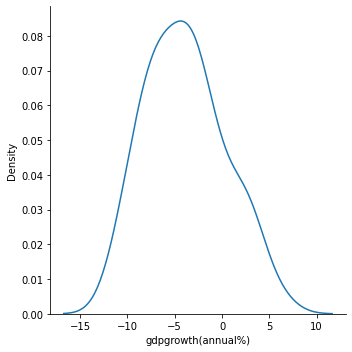

In [ ]:
# Distribution plot for the GDP growth (annual%)

sns.displot(wb_df['gdpgrowth(annual%)'], kind="kde");
# Shows a normal distribution

From our observation our Gross Domestic Product shows a normal distribution.

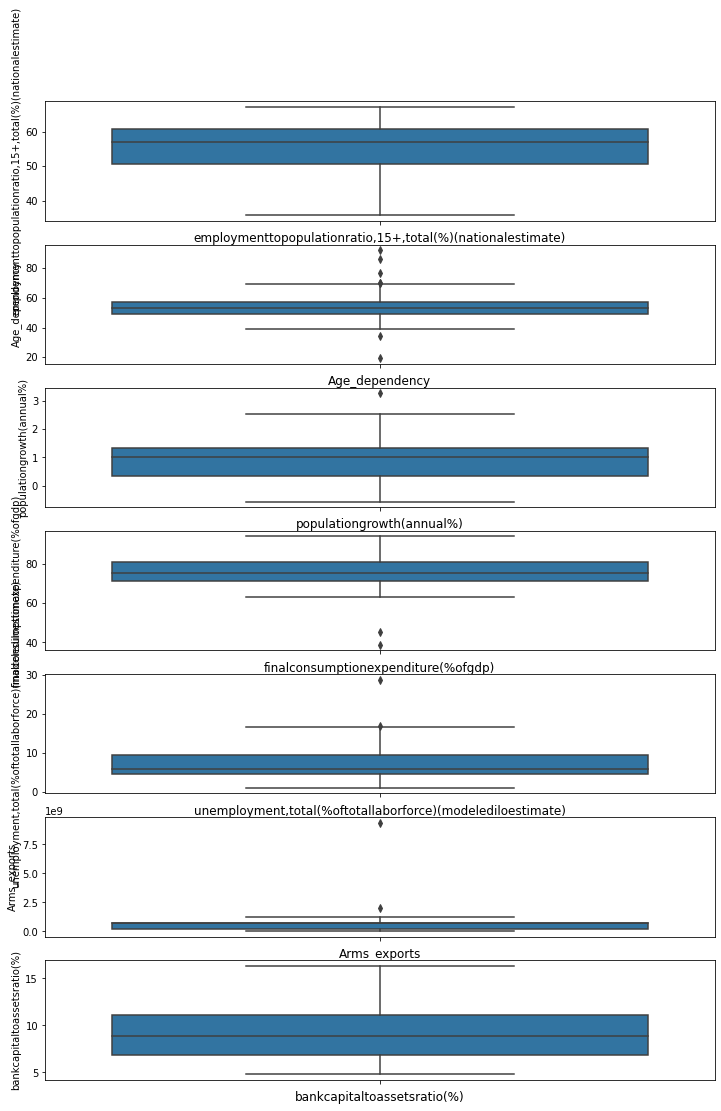

In [ ]:
# Checking for anomalies.

numerical_columns = ['employmenttopopulationratio,15+,total(%)(nationalestimate)', 'Age_dependency', 'populationgrowth(annual%)','finalconsumptionexpenditure(%ofgdp)','unemployment,total(%oftotallaborforce)(modelediloestimate)','Arms_exports', 'bankcapitaltoassetsratio(%)']
fig, ax = plt.subplots(len(numerical_columns), figsize=(12,18))

for i, col_val in enumerate(numerical_columns):

    sns.boxplot(y=wb_df[col_val], ax=ax[i])
    ax[i].set_xlabel(col_val, fontsize=12);

plt.show();

We had some outliers in our dataset but we did not drop them since they represent true values.

In [ ]:

wb_df.replace(np.nan, 0, inplace=True)
wb_df

,country,region,Adultchildren_newly_Hiv,Adults15-49newly_affected,Age_dependency,Age_dependency_old,Age_dependency_Young,Arms_exports,Arms_inputs,"automatedtellermachines(atms)(per100,000adults)",Average_remittances,Average_transaction_cost,bankcapitaltoassetsratio(%),bankliquidreservestobankassetsratio(%),banknonperformingloanstototalgrossloans(%),"chargesfortheuseofintellectualproperty,payments(bop,currentus$)","chargesfortheuseofintellectualproperty,receipts(bop,currentus$)","commercialbankbranches(per100,000adults)","computer,communicationsandotherservices(%ofcommercialserviceexports)","computer,communicationsandotherservices(%ofcommercialserviceimports)",consumerpriceindex(2010=100),domesticcreditprovidedbyfinancialsector(%ofgdp),domesticcredittoprivatesector(%ofgdp),domesticcredittoprivatesectorbybanks(%ofgdp),"employmenttopopulationratio,15+,female(%)(nationalestimate)","employmenttopopulationratio,15+,male(%)(nationalestimate)","employmenttopopulationratio,15+,total(%)(nationalestimate)","employmenttopopulationratio,ages15-24,female(%)(nationalestimate)","employmenttopopulationratio,ages15-24,male(%)(nationalestimate)","employmenttopopulationratio,ages15-24,total(%)(nationalestimate)",finalconsumptionexpenditure(%ofgdp),finalconsumptionexpenditure(annual%growth),finalconsumptionexpenditure(constant2010us$),finalconsumptionexpenditure(constantlcu),finalconsumptionexpenditure(currentlcu),finalconsumptionexpenditure(currentus$),fixedbroadbandsubscriptions,fixedbroadbandsubscriptions(per100people),fixedtelephonesubscriptions,fixedtelephonesubscriptions(per100people),gdp(constant2010us$),gdpgrowth(annual%),gdppercapita(constant2010us$),gni(constant2010us$),gnigrowth(annual%),gnipercapita(constant2010us$),high-technologyexports(currentus$),humancapitalindex(hci)(scale0-1),individualsusingtheinternet(%ofpopulation),"laborforce,total",militaryexpenditure(%ofgdp),populationdensity(peoplepersq.kmoflandarea),populationgrowth(annual%),"population,female","population,male","population,total",ratiooffemaletomalelaborforceparticipationrate(%)(nationalestimate),"totalreserves(includesgold,currentus$)","unemployment,total(%oftotallaborforce)(modelediloestimate)",urbanpopulation,womenbusinessandthelawindexscore(scale1-100)
0,Algeria,NorthernAfrica,1700.0,1400.00000,60.067725,10.793250,49.274474,7.039231e+08,5.490000e+08,0.000000,8.053924,10.519145,0.000000,14.572593,0.000000,0.000000e+00,0.000000e+00,0.00,0.000000,0.000000,155.017250,0.000000,29.644683,29.629751,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,66.220612,-3.199239,1.092990e+11,9.996650e+12,1.218690e+13,9.612842e+10,3790459.0,8.643942,4784306.0,10.910358,1.913110e+11,-5.480992,4362.739536,1.875860e+11,-5.201186,4277.795776,0.000000e+00,0.534556,0.000000,12231916,6.659994,18.411340,1.836534,21697235,22153808,43851043,0.000000,5.943439e+10,12.83,32332690,57.500
1,Argentina,SouthAmerica,5600.0,5000.00000,55.767661,17.705349,38.062312,7.039231e+08,7.000000e+06,62.451861,8.053924,6.045787,15.452708,0.000000,3.860953,1.259954e+09,2.141864e+08,13.21,66.675183,57.566180,0.000000,0.000000,0.000000,0.000000,41.020000,59.240002,49.599998,17.930000,28.230000,23.110001,79.777523,-11.709644,3.256970e+11,5.191880e+11,2.155690e+13,3.056010e+11,9571562.0,21.178002,7356165.0,16.276223,3.944470e+11,-9.905235,8692.708046,3.836430e+11,-8.546426,8454.617014,5.464458e+08,0.602145,0.000000,19191447,0.761487,16.580893,0.970054,23239321,22137442,45376763,0.000000,3.940373e+10,11.67,41796990,76.250
2,Australia,Oceania,750.0,1000.00000,55.051941,25.138662,29.913279,3.960000e+08,1.658000e+09,129.692233,7.214873,6.045787,7.998032,4.253643,1.107783,3.422638e+09,8.463610e+08,25.43,32.243937,51.335948,120.811654,0.000000,141.959405,141.959405,56.390000,65.450000,60.830002,57.720000,55.850000,56.760000,73.926307,-0.524927,1.078140e+12,1.443060e+12,1.467760e+12,9.838860e+11,8937550.0,35.049375,6200000.0,24.313836,1.446370e+12,-0.284839,56307.280680,0.000000e+00,0.000000,0.000000,5.709108e+09,0.770240,

In [ ]:
#Creating a new cleaned dataframe
wb_df.to_csv('wb_df1.csv')


In [ ]:
#loading new dataframe
wb_df1 = pd.read_csv("/content/wb_df1.csv")
wb_df1.head()

,Unnamed: 0,country,region,Adultchildren_newly_Hiv,Adults15-49newly_affected,Age_dependency,Age_dependency_old,Age_dependency_Young,Arms_exports,Arms_inputs,"automatedtellermachines(atms)(per100,000adults)",Average_remittances,Average_transaction_cost,bankcapitaltoassetsratio(%),bankliquidreservestobankassetsratio(%),banknonperformingloanstototalgrossloans(%),"chargesfortheuseofintellectualproperty,payments(bop,currentus$)","chargesfortheuseofintellectualproperty,receipts(bop,currentus$)","commercialbankbranches(per100,000adults)","computer,communicationsandotherservices(%ofcommercialserviceexports)","computer,communicationsandotherservices(%ofcommercialserviceimports)",consumerpriceindex(2010=100),domesticcreditprovidedbyfinancialsector(%ofgdp),domesticcredittoprivatesector(%ofgdp),domesticcredittoprivatesectorbybanks(%ofgdp),"employmenttopopulationratio,15+,female(%)(nationalestimate)","employmenttopopulationratio,15+,male(%)(nationalestimate)","employmenttopopulationratio,15+,total(%)(nationalestimate)","employmenttopopulationratio,ages15-24,female(%)(nationalestimate)","employmenttopopulationratio,ages15-24,male(%)(nationalestimate)","employmenttopopulationratio,ages15-24,total(%)(nationalestimate)",finalconsumptionexpenditure(%ofgdp),finalconsumptionexpenditure(annual%growth),finalconsumptionexpenditure(constant2010us$),finalconsumptionexpenditure(constantlcu),finalconsumptionexpenditure(currentlcu),finalconsumptionexpenditure(currentus$),fixedbroadbandsubscriptions,fixedbroadbandsubscriptions(per100people),fixedtelephonesubscriptions,fixedtelephonesubscriptions(per100people),gdp(constant2010us$),gdpgrowth(annual%),gdppercapita(constant2010us$),gni(constant2010us$),gnigrowth(annual%),gnipercapita(constant2010us$),high-technologyexports(currentus$),humancapitalindex(hci)(scale0-1),individualsusingtheinternet(%ofpopulation),"laborforce,total",militaryexpenditure(%ofgdp),populationdensity(peoplepersq.kmoflandarea),populationgrowth(annual%),"population,female","population,male","population,total",ratiooffemaletomalelaborforceparticipationrate(%)(nationalestimate),"totalreserves(includesgold,currentus$)","unemployment,total(%oftotallaborforce)(modelediloestimate)",urbanpopulation,womenbusinessandthelawindexscore(scale1-100)
0,0,Algeria,NorthernAfrica,1700.0,1400.00000,60.067725,10.793250,49.274474,7.039231e+08,5.490000e+08,0.000000,8.053924,10.519145,0.000000,14.572593,0.000000,0.000000e+00,0.000000e+00,0.00,0.000000,0.000000,155.017250,0.0,29.644683,29.629751,0.00,0.000000,0.000000,0.00,0.00,0.000000,66.220612,-3.199239,1.092990e+11,9.996650e+12,1.218690e+13,9.612842e+10,3790459.0,8.643942,4784306.0,10.910358,1.913110e+11,-5.480992,4362.739536,1.875860e+11,-5.201186,4277.795776,0.000000e+00,0.534556,0.000000,12231916,6.659994,18.411340,1.836534,21697235,22153808,43851043,0.000000,5.943439e+10,12.83,32332690,57.500
1,1,Argentina,SouthAmerica,5600.0,5000.00000,55.767661,17.705349,38.062312,7.039231e+08,7.000000e+06,62.451861,8.053924,6.045787,15.452708,0.000000,3.860953,1.259954e+09,2.141864e+08,13.21,66.675183,57.566180,0.000000,0.0,0.000000,0.000000,41.02,59.240002,49.599998,17.93,28.23,23.110001,79.777523,-11.709644,3.256970e+11,5.191880e+11,2.155690e+13,3.056010e+11,9571562.0,21.178002,7356165.0,16.276223,3.944470e+11,-9.905235,8692.708046,3.836430e+11,-8.546426,8454.617014,5.464458e+08,0.602145,0.000000,19191447,0.761487,16.580893,0.970054,23239321,22137442,45376763,0.000000,3.940373e+10,11.67,41796990,76.250
2,2,Australia,Oceania,750.0,1000.00000,55.051941,25.138662,29.913279,3.960000e+08,1.658000e+09,129.692233,7.214873,6.045787,7.998032,4.253643,1.107783,3.422638e+09,8.463610e+08,25.43,32.243937,51.335948,120.811655,0.0,141.959405,141.959405,56.39,65.450000,60.830002,57.72,55.85,56.760000,73.926307,-0.524927,1.078140e+12,1.443060e+12,1.467760e+12,9.838860e+11,8937550.0,35.049375,6200000.0,24.313836,1.446370e+12,-0.284839,56307.280680,0.000000e+00,0.000000,0.000000,5.709108e+09,0.770240,0.000000,13452598,2.063043,3.33944

# Exploratory Data Analysis

## Univariate Analysis

In [ ]:
# Checking data descriptive statistics

wb_df1.describe()

,Unnamed: 0,Adultchildren_newly_Hiv,Adults15-49newly_affected,Age_dependency,Age_dependency_old,Age_dependency_Young,Arms_exports,Arms_inputs,"automatedtellermachines(atms)(per100,000adults)",Average_remittances,Average_transaction_cost,bankcapitaltoassetsratio(%),bankliquidreservestobankassetsratio(%),banknonperformingloanstototalgrossloans(%),"chargesfortheuseofintellectualproperty,payments(bop,currentus$)","chargesfortheuseofintellectualproperty,receipts(bop,currentus$)","commercialbankbranches(per100,000adults)","computer,communicationsandotherservices(%ofcommercialserviceexports)","computer,communicationsandotherservices(%ofcommercialserviceimports)",consumerpriceindex(2010=100),domesticcreditprovidedbyfinancialsector(%ofgdp),domesticcredittoprivatesector(%ofgdp),domesticcredittoprivatesectorbybanks(%ofgdp),"employmenttopopulationratio,15+,female(%)(nationalestimate)","employmenttopopulationratio,15+,male(%)(nationalestimate)","employmenttopopulationratio,15+,total(%)(nationalestimate)","employmenttopopulationratio,ages15-24,female(%)(nationalestimate)","employmenttopopulationratio,ages15-24,male(%)(nationalestimate)","employmenttopopulationratio,ages15-24,total(%)(nationalestimate)",finalconsumptionexpenditure(%ofgdp),finalconsumptionexpenditure(annual%growth),finalconsumptionexpenditure(constant2010us$),finalconsumptionexpenditure(constantlcu),finalconsumptionexpenditure(currentlcu),finalconsumptionexpenditure(currentus$),fixedbroadbandsubscriptions,fixedbroadbandsubscriptions(per100people),fixedtelephonesubscriptions,fixedtelephonesubscriptions(per100people),gdp(constant2010us$),gdpgrowth(annual%),gdppercapita(constant2010us$),gni(constant2010us$),gnigrowth(annual%),gnipercapita(constant2010us$),high-technologyexports(currentus$),humancapitalindex(hci)(scale0-1),individualsusingtheinternet(%ofpopulation),"laborforce,total",militaryexpenditure(%ofgdp),populationdensity(peoplepersq.kmoflandarea),populationgrowth(annual%),"population,female","population,male","population,total",ratiooffemaletomalelaborforceparticipationrate(%)(nationalestimate),"totalreserves(includesgold,currentus$)","unemployment,total(%oftotallaborforce)(modelediloestimate)",urbanpopulation,womenbusinessandthelawindexscore(scale1-100)
count,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,5.700000e+01,5.700000e+01,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,5.700000e+01,5.700000e+01,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,5.700000e+01,5.700000e+01,5.700000e+01,5.700000e+01,5.700000e+01,57.000000,5.700000e+01,57.000000,5.700000e+01,57.000000,57.000000,5.700000e+01,57.000000,57.000000,5.700000e+01,57.000000,57.000000,5.700000e+01,57.000000,57.000000,57.000000,5.700000e+01,5.700000e+01,5.700000e+01,57.000000,5.700000e+01,57.000000,5.700000e+01,57.000000
mean,28.000000,11179.649123,11840.476190,54.549532,18.407427,36.142105,7.039231e+08,3.054386e+08,48.938535,8.053924,6.045787,7.091567,11.607252,3.899059,5.163430e+09,5.829422e+09,11.749123,41.053683,38.510354,143.437616,22.255204,58.800452,58.804258,30.789474,39.999649,35.271930,20.234912,23.972807,22.139825,64.145787,-2.115362,5.394291e+11,1.899784e+14,2.960054e+14,4.153890e+11,1.849095e+07,21.172108,1.242197e+07,18.563433,1.121083e+12,-3.765467,20704.294508,4.145102e+11,-2.287788,9605.185007,3.843134e+10,0.627977,41.542384,4.811398e+07,2.009995,298.998842,0.964436,5.367960e+07,5.507711e+07,1.087567e+08,43.662757,2.042107e+11,7.568421,6.134836e+07,81.611842
std,16.598193,33015.338966,27317.642517,11.447176,10.895289,15.854687,1.224164e+09,5.553214e+08,51.580573,2.554718,1.632824,4.869527,14.535743,6.559847,1.024682e+10,1.763469e+10,11.890751,28.005426,24.201135,80.390375,55.286754,57.365199,48.374098,24.827862,31.362962,27.837152,19.958009,21.554934,20.567263,29.612786,4.886068,9.564600e+11,9.671080e+14,1.518949e+15,5.572219e+11,6.516819e+07,15.433872,2.848707e+07,15.922

In [ ]:
# Finding the mean
wb_df1[['employmenttopopulationratio,15+,total(%)(nationalestimate)', 'Age_dependency', 'populationgrowth(annual%)',
       'finalconsumptionexpenditure(%ofgdp)','Arms_exports', 'bankcapitaltoassetsratio(%)']].mean()

employmenttopopulationratio,15+,total(%)(nationalestimate)    3.527193e+01
Age_dependency                                                5.454953e+01
populationgrowth(annual%)                                     9.644361e-01
finalconsumptionexpenditure(%ofgdp)                           6.414579e+01
Arms_exports                                                  7.039231e+08
bankcapitaltoassetsratio(%)                                   7.091567e+00
dtype: float64

In [ ]:
# Finding the standard deviation
for column in numerical_columns:
  print('\n')
  print(column + ', Standard deviation: '+ str(wb_df1[column].std()))
  print(column + ', Variance: '+ str(wb_df1[column].var()))
  print(column + ', Skewness: '+ str(wb_df1[column].skew()))
  print(column + ', Kurtosis: '+ str(wb_df1[column].kurt()))



employmenttopopulationratio,15+,total(%)(nationalestimate), Standard deviation: 27.837152081669938
employmenttopopulationratio,15+,total(%)(nationalestimate), Variance: 774.907036018021
employmenttopopulationratio,15+,total(%)(nationalestimate), Skewness: -0.4211909325194843
employmenttopopulationratio,15+,total(%)(nationalestimate), Kurtosis: -1.7191073963946015


Age_dependency, Standard deviation: 11.447175971961036
Age_dependency, Variance: 131.0378377330421
Age_dependency, Skewness: 0.5783111347277943
Age_dependency, Kurtosis: 3.0632075092056077


populationgrowth(annual%), Standard deviation: 0.8291369393983749
populationgrowth(annual%), Variance: 0.6874680642749044
populationgrowth(annual%), Skewness: 0.3640176719746862
populationgrowth(annual%), Kurtosis: 0.019302649050718657


finalconsumptionexpenditure(%ofgdp), Standard deviation: 29.612785819542925
finalconsumptionexpenditure(%ofgdp), Variance: 876.9170839941224
finalconsumptionexpenditure(%ofgdp), Skewness: -1.5414277311

In [ ]:
# Finding the Interquantile range

for column in numerical_columns:
  print('\n')
  print(wb_df1[column].quantile([0.25, 0.5, 0.75]))



0.25     0.000000
0.50    49.599998
0.75    58.520000
Name: employmenttopopulationratio,15+,total(%)(nationalestimate), dtype: float64


0.25    49.082672
0.50    53.335836
0.75    57.345835
Name: Age_dependency, dtype: float64


0.25    0.350911
0.50    1.002774
0.75    1.345430
Name: populationgrowth(annual%), dtype: float64


0.25    68.257549
0.50    74.783572
0.75    79.896473
Name: finalconsumptionexpenditure(%ofgdp), dtype: float64


0.25    4.61
0.50    5.92
0.75    9.48
Name: unemployment,total(%oftotallaborforce)(modelediloestimate), dtype: float64


0.25    1.910000e+08
0.50    7.039231e+08
0.75    7.039231e+08
Name: Arms_exports, dtype: float64


0.25     4.774469
0.50     7.239383
0.75    10.581282
Name: bankcapitaltoassetsratio(%), dtype: float64


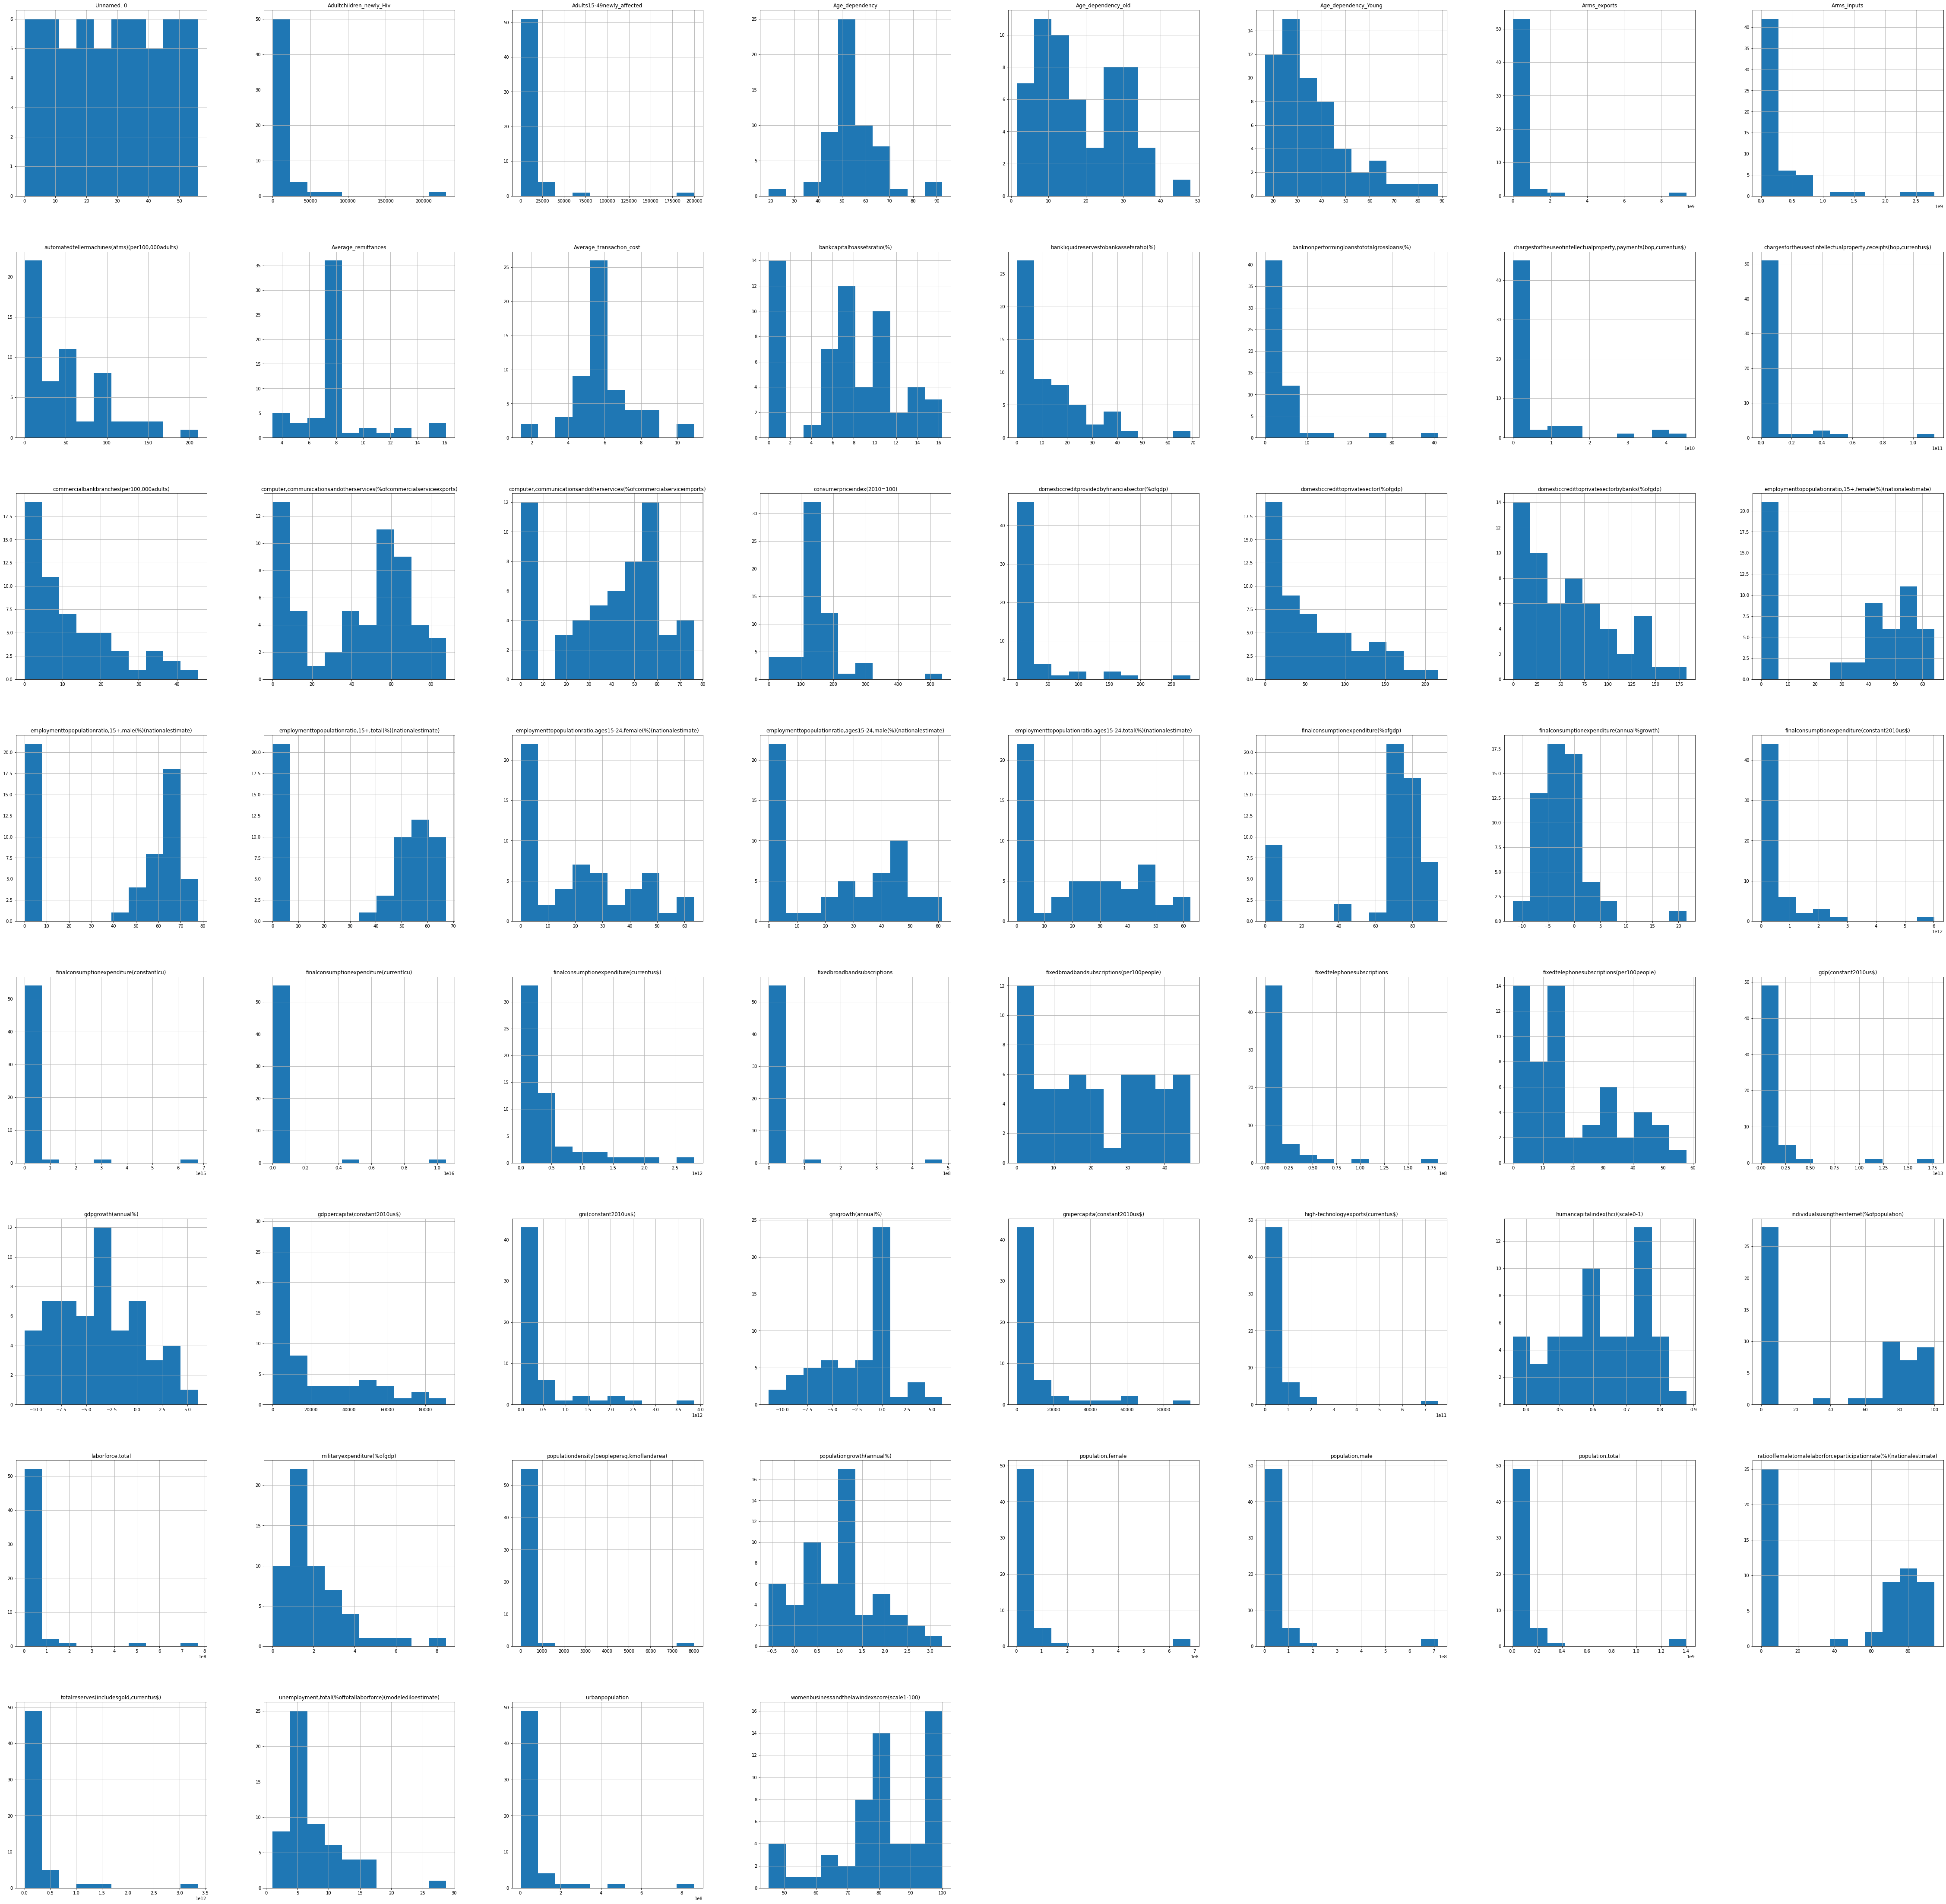

In [ ]:
# Plotting Histograms
wb_df1.hist(figsize=(80,80), sharex=False, sharey=False, xlabelsize= 10, ylabelsize=10)
plt.show()

  Most of the columns have data that are skewed to the left, with very few skewed to the right and uniformly.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


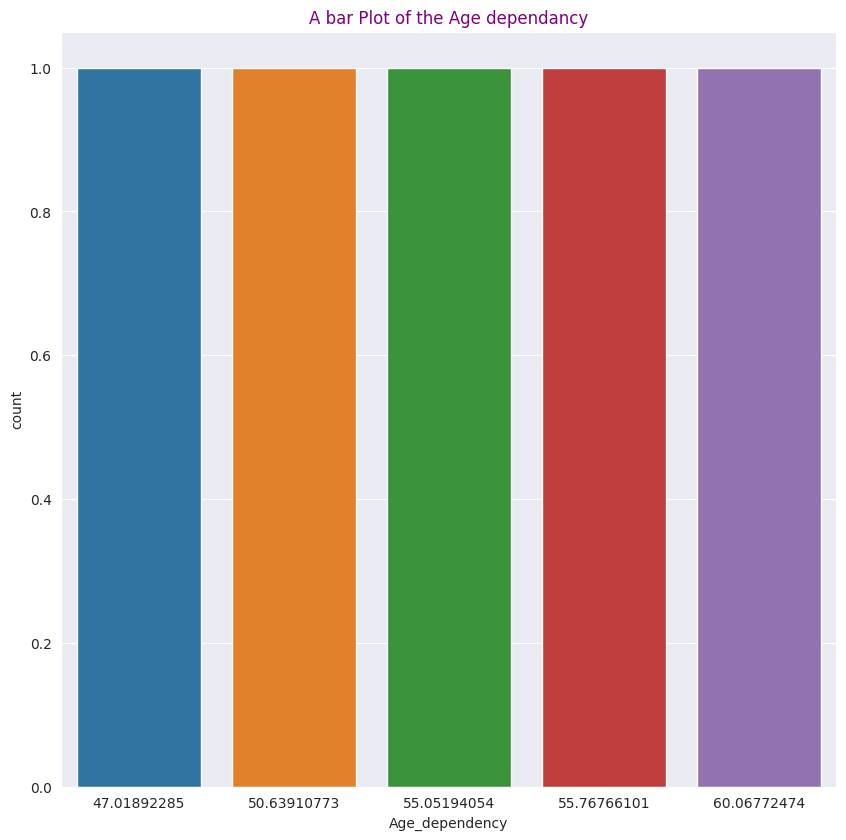

In [ ]:
# Plotting a bar plot of respondent age dependency using seaborn
#r chart

plt.figure(figsize=[10, 10],dpi = 100)
sns.set_style('darkgrid')
sns.countplot(wb_df1.Age_dependency.head())
plt.title('A bar Plot of the Age dependancy', color = 'purple')
plt.show()

From the above plot we can see that from the age of 47 to 60 the dependancy rate is similar.

# Bivariate Analysis

In [ ]:
# Checking our columns
wb_df1.columns

Index(['Unnamed: 0', 'country', 'region', 'Adultchildren_newly_Hiv',
       'Adults15-49newly_affected', 'Age_dependency', 'Age_dependency_old',
       'Age_dependency_Young', 'Arms_exports', 'Arms_inputs',
       'automatedtellermachines(atms)(per100,000adults)',
       'Average_remittances', 'Average_transaction_cost',
       'bankcapitaltoassetsratio(%)', 'bankliquidreservestobankassetsratio(%)',
       'banknonperformingloanstototalgrossloans(%)',
       'chargesfortheuseofintellectualproperty,payments(bop,currentus$)',
       'chargesfortheuseofintellectualproperty,receipts(bop,currentus$)',
       'commercialbankbranches(per100,000adults)',
       'computer,communicationsandotherservices(%ofcommercialserviceexports)',
       'computer,communicationsandotherservices(%ofcommercialserviceimports)',
       'consumerpriceindex(2010=100)',
       'domesticcreditprovidedbyfinancialsector(%ofgdp)',
       'domesticcredittoprivatesector(%ofgdp)',
       'domesticcredittoprivatesectorbyban

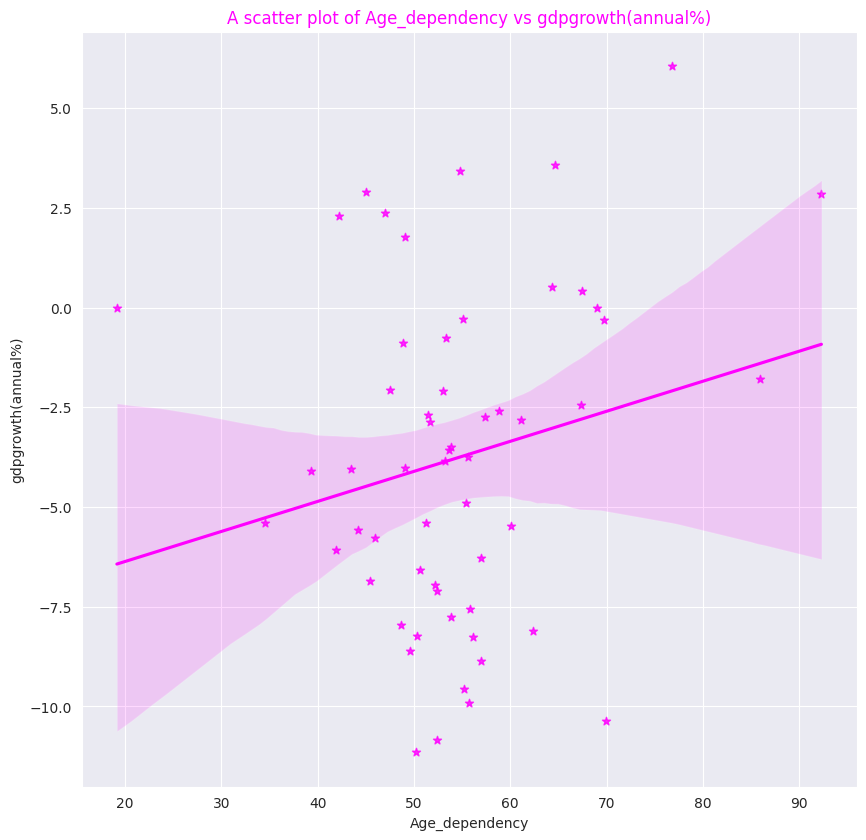

In [ ]:
# Plotting a scatter plot of Age_Dependancy vs gdpgrowth
plt.figure(figsize=[10, 10], dpi = 100)
sns.regplot(x = wb_df1["Age_dependency"], y = wb_df1["gdpgrowth(annual%)"], fit_reg=True, color = 'magenta', marker = '*')
plt.title("A scatter plot of Age_dependency vs gdpgrowth(annual%)", color = 'magenta');


Between ages 60 to 80 there is a higher dependancy rate as compared to the ages between 20 and 40.

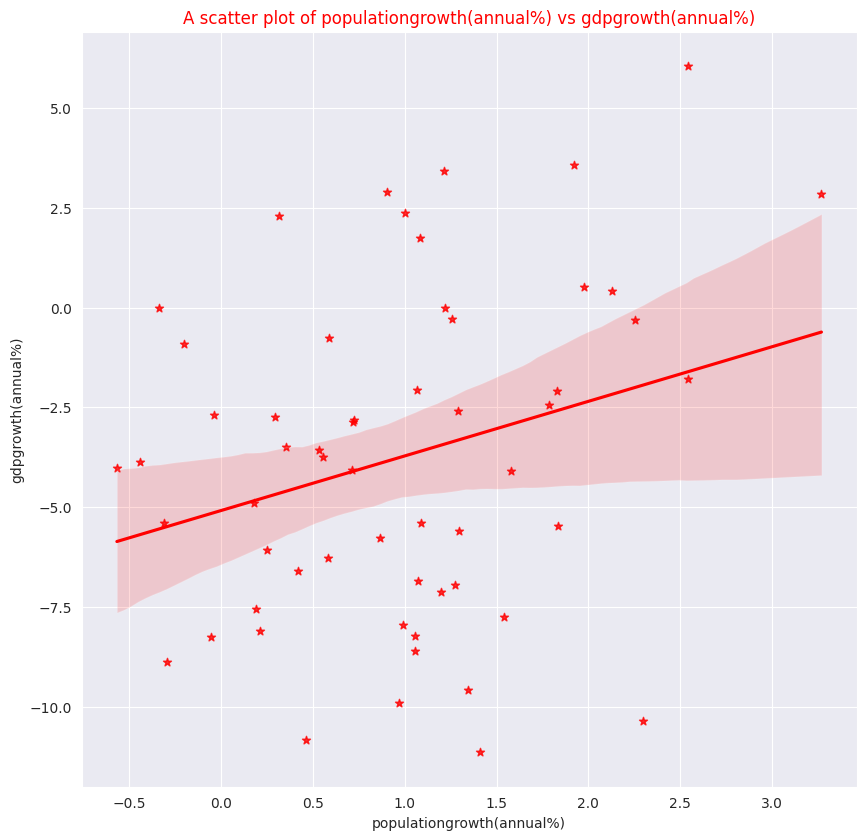

In [ ]:
# Plotting a scatter plot of population growth vs gdpgrowth
plt.figure(figsize=[10, 10], dpi = 100)
sns.regplot(x = wb_df1["populationgrowth(annual%)"], y = wb_df1["gdpgrowth(annual%)"], fit_reg=True, color = 'red', marker = '*')
plt.title("A scatter plot of populationgrowth(annual%) vs gdpgrowth(annual%)", color = 'red');

The high the population rate the high the Gross Domestic Rate.

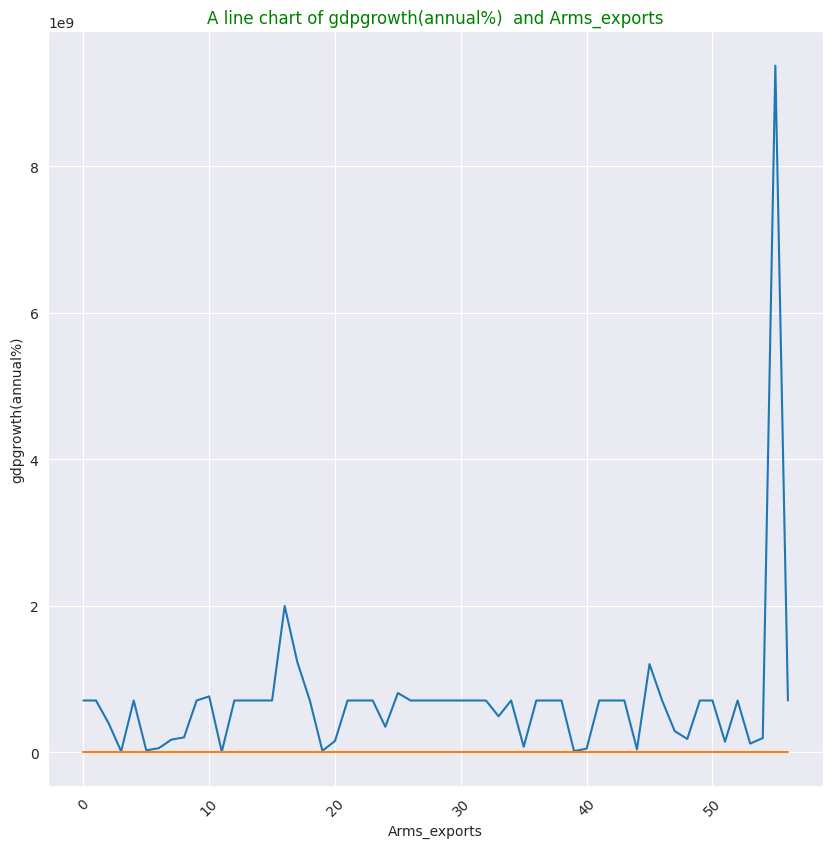

In [ ]:
#plotting line chart of the Arms_exports and gdpgrowth(annual%)
plt.figure(figsize = (10,10), dpi = 100)
plt.plot(wb_df1[['Arms_exports', 'gdpgrowth(annual%)']])
plt.xticks(rotation = 45)
plt.title('A line chart of gdpgrowth(annual%)  and Arms_exports', color = 'Green')
plt.xlabel('Arms_exports')
plt.ylabel('gdpgrowth(annual%)')
plt.show()

As Arms Exports increases the Gross Domestic Product also increases.

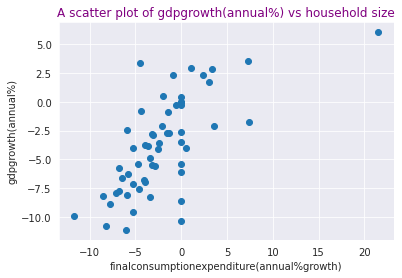

In [ ]:
#Plotting our scatterplot using matplotlibplt.figure(dpi = 100)
plt.scatter(wb_df1['finalconsumptionexpenditure(annual%growth)'], wb_df1['gdpgrowth(annual%)'])
plt.title('A scatter plot of gdpgrowth(annual%) vs household size', color = 'purple')

plt.xlabel('finalconsumptionexpenditure(annual%growth)')

plt.ylabel('gdpgrowth(annual%)')

plt.show()

An increase in finalconsumptionexpenditure increases the GDP also increases.

In [ ]:
#correlation between variables
correlation = wb_df1.corr()
correlation


,Unnamed: 0,Adultchildren_newly_Hiv,Adults15-49newly_affected,Age_dependency,Age_dependency_old,Age_dependency_Young,Arms_exports,Arms_inputs,"automatedtellermachines(atms)(per100,000adults)",Average_remittances,Average_transaction_cost,bankcapitaltoassetsratio(%),bankliquidreservestobankassetsratio(%),banknonperformingloanstototalgrossloans(%),"chargesfortheuseofintellectualproperty,payments(bop,currentus$)","chargesfortheuseofintellectualproperty,receipts(bop,currentus$)","commercialbankbranches(per100,000adults)","computer,communicationsandotherservices(%ofcommercialserviceexports)","computer,communicationsandotherservices(%ofcommercialserviceimports)",consumerpriceindex(2010=100),domesticcreditprovidedbyfinancialsector(%ofgdp),domesticcredittoprivatesector(%ofgdp),domesticcredittoprivatesectorbybanks(%ofgdp),"employmenttopopulationratio,15+,female(%)(nationalestimate)","employmenttopopulationratio,15+,male(%)(nationalestimate)","employmenttopopulationratio,15+,total(%)(nationalestimate)","employmenttopopulationratio,ages15-24,female(%)(nationalestimate)","employmenttopopulationratio,ages15-24,male(%)(nationalestimate)","employmenttopopulationratio,ages15-24,total(%)(nationalestimate)",finalconsumptionexpenditure(%ofgdp),finalconsumptionexpenditure(annual%growth),finalconsumptionexpenditure(constant2010us$),finalconsumptionexpenditure(constantlcu),finalconsumptionexpenditure(currentlcu),finalconsumptionexpenditure(currentus$),fixedbroadbandsubscriptions,fixedbroadbandsubscriptions(per100people),fixedtelephonesubscriptions,fixedtelephonesubscriptions(per100people),gdp(constant2010us$),gdpgrowth(annual%),gdppercapita(constant2010us$),gni(constant2010us$),gnigrowth(annual%),gnipercapita(constant2010us$),high-technologyexports(currentus$),humancapitalindex(hci)(scale0-1),individualsusingtheinternet(%ofpopulation),"laborforce,total",militaryexpenditure(%ofgdp),populationdensity(peoplepersq.kmoflandarea),populationgrowth(annual%),"population,female","population,male","population,total",ratiooffemaletomalelaborforceparticipationrate(%)(nationalestimate),"totalreserves(includesgold,currentus$)","unemployment,total(%oftotallaborforce)(modelediloestimate)",urbanpopulation,womenbusinessandthelawindexscore(scale1-100)
Unnamed: 0,1.000000,0.131551,0.143349,-0.104532,-0.073599,-0.024896,0.201561,-0.089416,-0.193745,0.055818,0.124573,0.043010,0.085708,0.170039,0.067195,0.179712,0.010969,-0.159707,-0.104190,-0.011154,0.230038,-0.061317,-0.101779,0.014302,0.009785,0.012575,-0.030514,-0.026529,-0.028549,-0.096374,0.143708,-0.267969,0.019622,0.030308,-0.211811,-0.113845,-0.068845,-0.090800,-0.156078,0.043502,0.028113,-0.029240,-0.148381,0.133495,-0.023681,-0.069369,-0.009820,0.178586,-0.137794,0.067689,0.109888,-0.056126,-0.133635,-0.134126,-0.133900,-0.004759,-0.047960,-0.048262,-0.137541,0.055603
Adultchildren_newly_Hiv,0.131551,1.000000,0.969221,0.174868,-0.295181,0.329103,-0.083988,-0.117400,-0.054820,0.552067,0.262866,0.121468,0.190394,0.084598,-0.131779,-0.106942,-0.122798,-0.125635,-0.034071,0.003533,-0.061663,-0.218448,-0.088365,-0.109868,-0.081774,-0.095414,-0.181175,-0.154585,-0.169082,0.113491,0.066629,-0.037892,0.057724,0.057663,-0.038719,-0.068036,-0.355252,-0.086234,-0.287669,-0.069341,-0.021181,-0.212295,0.051168,-0.112695,-0.083556,-0.098738,-0.420668,-0.255882,-0.018105,-0.149707,-0.058918,0.250442,0.000523,-0.003393,-0.001497,0.000303,-0.086460,0.513072,0.006859,-0.062422
Adults15-49newly_affected,0.143349,0.969221,1.000000,0.166817,-0.246470,0.289817,-0.048290,-0.094374,-0.031170,0.522797,0.247221,0.107384,0.107069,0.067278,-0.071008,-0.057470,-0.087298,-0.048855,0.010791,-0.011043,-0.040710,-0.189320,-0.061055,-0.082041,-0.063823,-0.072522,-0.147820,-0.133461,-0.141944,0.084920,0.039641,-0.004020,0.044377,0.043807,-0.030060,-0.017441,-0.293686,-0.037204,-0.242024,-0.006036,-0.035139,-0.153205,0.020191,-0.089268,-0.081444,-0.046657,-0.364055,-0.249255,0.032852,-0.121918,-0.060785,0.222284,0.051176,0.048389,0.049742,0.023566

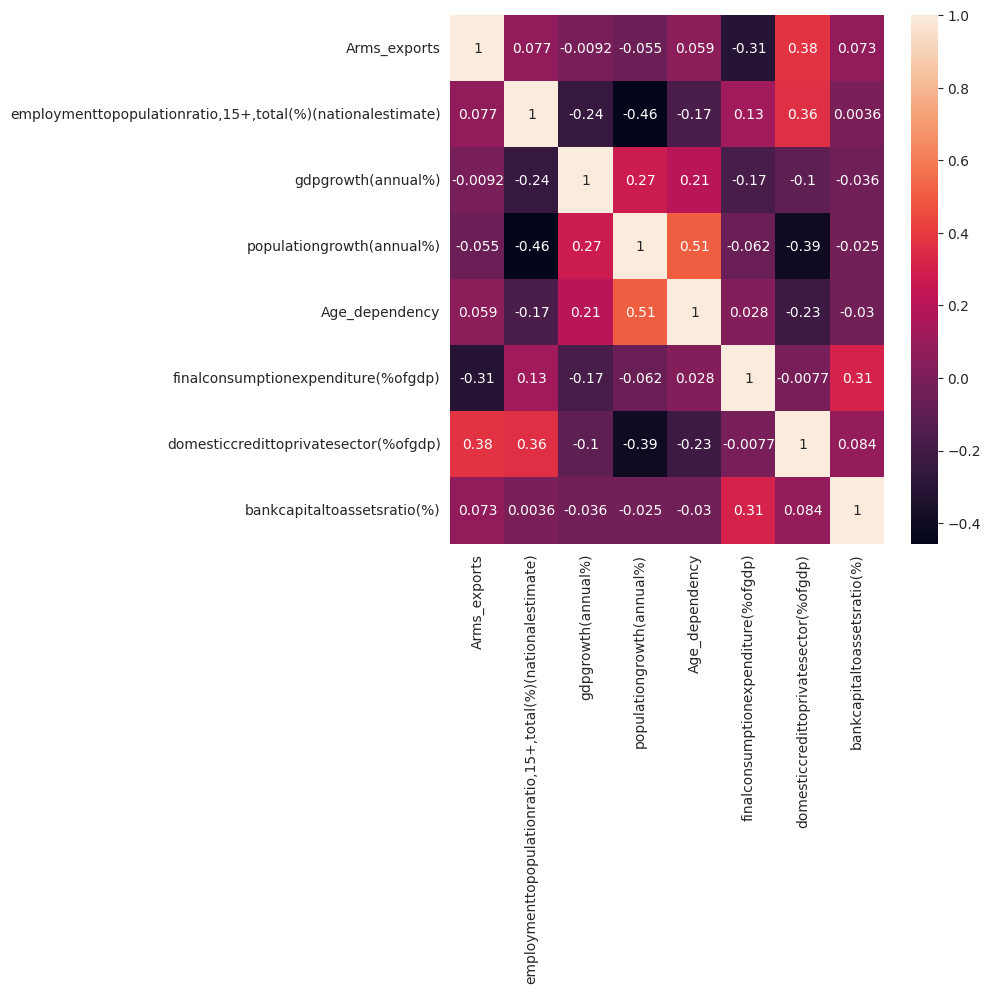

In [ ]:
# heatmap to show correlation 

 # heatmap to show correlation 
col_names = ['Arms_exports','employmenttopopulationratio,15+,total(%)(nationalestimate)','gdpgrowth(annual%)',
             'populationgrowth(annual%)','Age_dependency','finalconsumptionexpenditure(%ofgdp)','domesticcredittoprivatesector(%ofgdp)','bankcapitaltoassetsratio(%)']
plt.figure(figsize=[7, 7], dpi = 100)
sns.heatmap(wb_df1[col_names].corr(), annot=True);

# Employment Influences GDP as compared to other factors

1. Population growth is positively correlated to Age_Dependency, thus when population growth increases the Age_Dependency increases.
2. Domesticcredittoprivate sector is negatively correlated to finalconsumptionexpenditure, thus when one increases the other decreases.

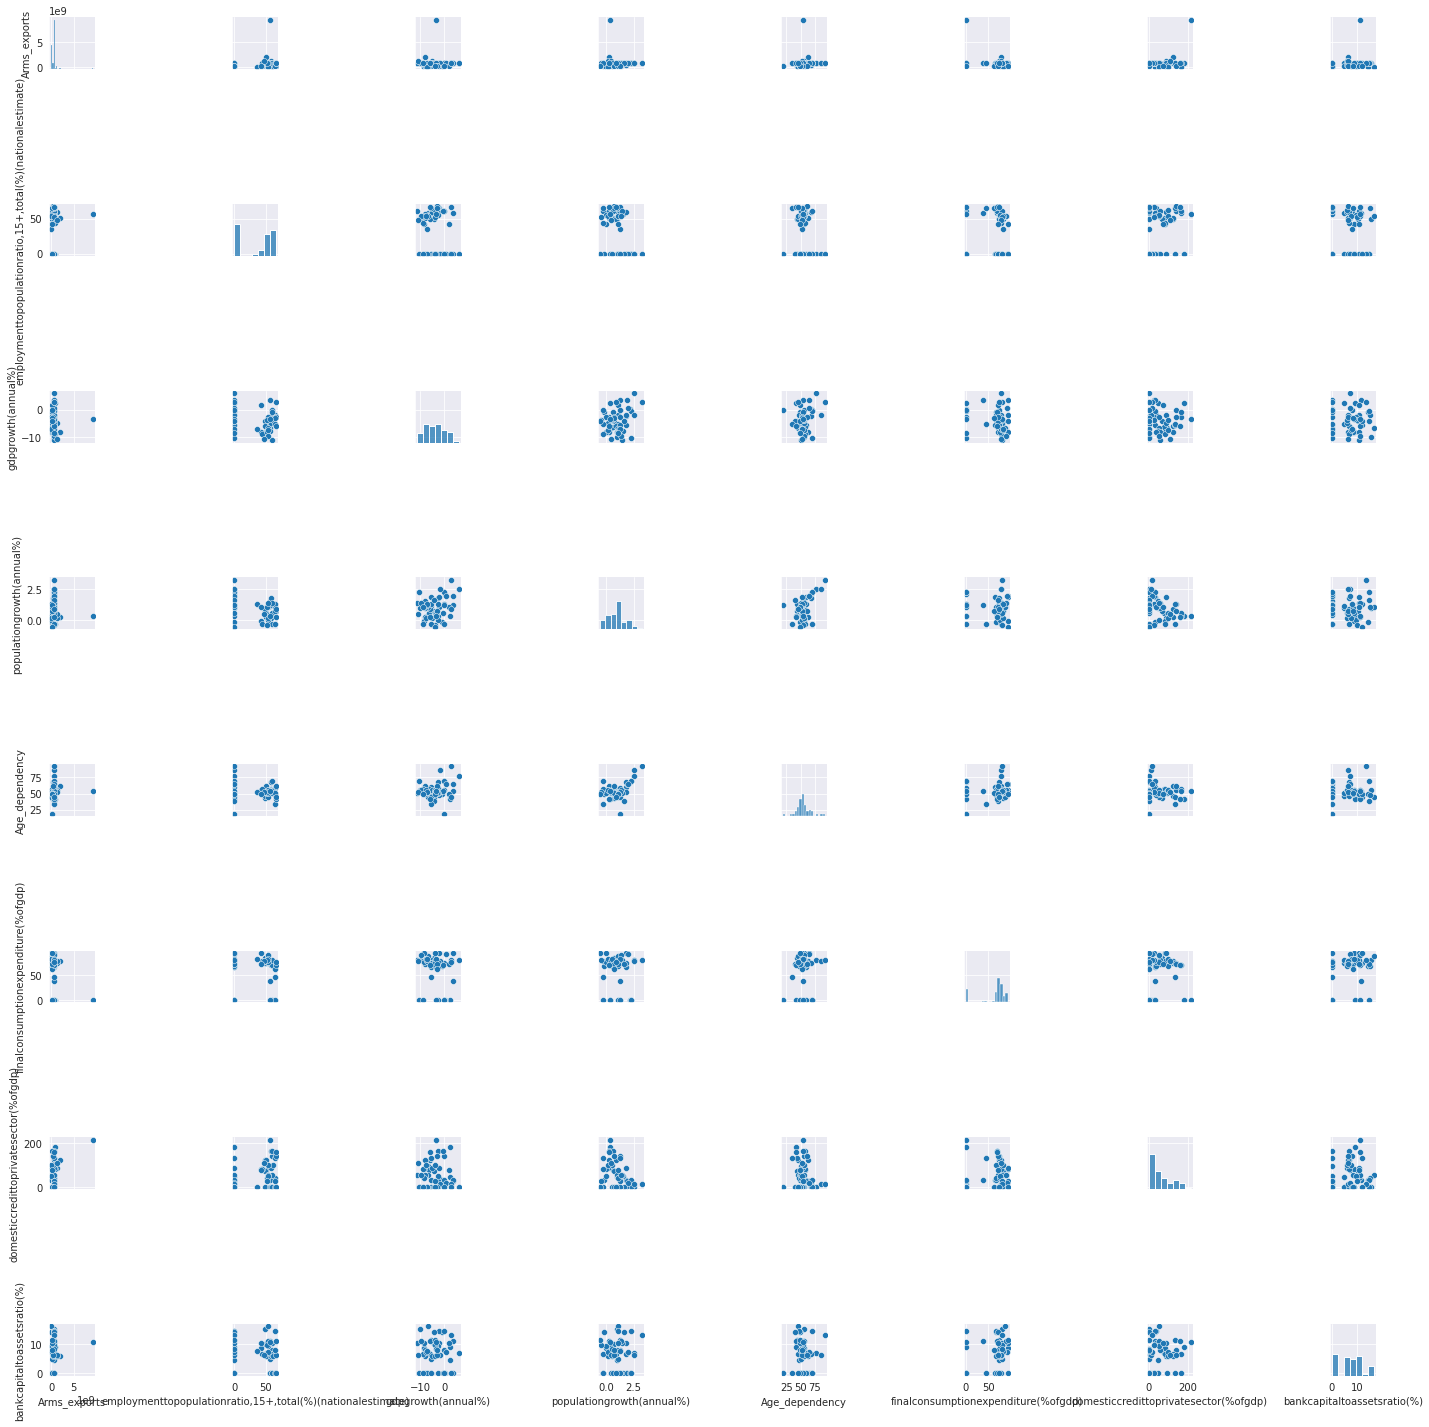

In [ ]:
# Plotting a pair plot
col_names = ['Arms_exports','employmenttopopulationratio,15+,total(%)(nationalestimate)','gdpgrowth(annual%)',
             'populationgrowth(annual%)','Age_dependency','finalconsumptionexpenditure(%ofgdp)','domesticcredittoprivatesector(%ofgdp)','bankcapitaltoassetsratio(%)']
sns.pairplot(wb_df[col_names]);
plt.show()

# Multivariate Analysis

In [ ]:
# First, we will import LabelEncoder
from sklearn.preprocessing import LabelEncoder

In [ ]:
# encoding all the columns
wb_df1.apply(LabelEncoder().fit_transform)
wb_df1.head()

,Unnamed: 0,country,region,Adultchildren_newly_Hiv,Adults15-49newly_affected,Age_dependency,Age_dependency_old,Age_dependency_Young,Arms_exports,Arms_inputs,"automatedtellermachines(atms)(per100,000adults)",Average_remittances,Average_transaction_cost,bankcapitaltoassetsratio(%),bankliquidreservestobankassetsratio(%),banknonperformingloanstototalgrossloans(%),"chargesfortheuseofintellectualproperty,payments(bop,currentus$)","chargesfortheuseofintellectualproperty,receipts(bop,currentus$)","commercialbankbranches(per100,000adults)","computer,communicationsandotherservices(%ofcommercialserviceexports)","computer,communicationsandotherservices(%ofcommercialserviceimports)",consumerpriceindex(2010=100),domesticcreditprovidedbyfinancialsector(%ofgdp),domesticcredittoprivatesector(%ofgdp),domesticcredittoprivatesectorbybanks(%ofgdp),"employmenttopopulationratio,15+,female(%)(nationalestimate)","employmenttopopulationratio,15+,male(%)(nationalestimate)","employmenttopopulationratio,15+,total(%)(nationalestimate)","employmenttopopulationratio,ages15-24,female(%)(nationalestimate)","employmenttopopulationratio,ages15-24,male(%)(nationalestimate)","employmenttopopulationratio,ages15-24,total(%)(nationalestimate)",finalconsumptionexpenditure(%ofgdp),finalconsumptionexpenditure(annual%growth),finalconsumptionexpenditure(constant2010us$),finalconsumptionexpenditure(constantlcu),finalconsumptionexpenditure(currentlcu),finalconsumptionexpenditure(currentus$),fixedbroadbandsubscriptions,fixedbroadbandsubscriptions(per100people),fixedtelephonesubscriptions,fixedtelephonesubscriptions(per100people),gdp(constant2010us$),gdpgrowth(annual%),gdppercapita(constant2010us$),gni(constant2010us$),gnigrowth(annual%),gnipercapita(constant2010us$),high-technologyexports(currentus$),humancapitalindex(hci)(scale0-1),individualsusingtheinternet(%ofpopulation),"laborforce,total",militaryexpenditure(%ofgdp),populationdensity(peoplepersq.kmoflandarea),populationgrowth(annual%),"population,female","population,male","population,total",ratiooffemaletomalelaborforceparticipationrate(%)(nationalestimate),"totalreserves(includesgold,currentus$)","unemployment,total(%oftotallaborforce)(modelediloestimate)",urbanpopulation,womenbusinessandthelawindexscore(scale1-100)
0,0,Algeria,NorthernAfrica,1700.0,1400.00000,60.067725,10.793250,49.274474,7.039231e+08,5.490000e+08,0.000000,8.053924,10.519145,0.000000,14.572593,0.000000,0.000000e+00,0.000000e+00,0.00,0.000000,0.000000,155.017250,0.0,29.644683,29.629751,0.00,0.000000,0.000000,0.00,0.00,0.000000,66.220612,-3.199239,1.092990e+11,9.996650e+12,1.218690e+13,9.612842e+10,3790459.0,8.643942,4784306.0,10.910358,1.913110e+11,-5.480992,4362.739536,1.875860e+11,-5.201186,4277.795776,0.000000e+00,0.534556,0.000000,12231916,6.659994,18.411340,1.836534,21697235,22153808,43851043,0.000000,5.943439e+10,12.83,32332690,57.500
1,1,Argentina,SouthAmerica,5600.0,5000.00000,55.767661,17.705349,38.062312,7.039231e+08,7.000000e+06,62.451861,8.053924,6.045787,15.452708,0.000000,3.860953,1.259954e+09,2.141864e+08,13.21,66.675183,57.566180,0.000000,0.0,0.000000,0.000000,41.02,59.240002,49.599998,17.93,28.23,23.110001,79.777523,-11.709644,3.256970e+11,5.191880e+11,2.155690e+13,3.056010e+11,9571562.0,21.178002,7356165.0,16.276223,3.944470e+11,-9.905235,8692.708046,3.836430e+11,-8.546426,8454.617014,5.464458e+08,0.602145,0.000000,19191447,0.761487,16.580893,0.970054,23239321,22137442,45376763,0.000000,3.940373e+10,11.67,41796990,76.250
2,2,Australia,Oceania,750.0,1000.00000,55.051941,25.138662,29.913279,3.960000e+08,1.658000e+09,129.692233,7.214873,6.045787,7.998032,4.253643,1.107783,3.422638e+09,8.463610e+08,25.43,32.243937,51.335948,120.811655,0.0,141.959405,141.959405,56.39,65.450000,60.830002,57.72,55.85,56.760000,73.926307,-0.524927,1.078140e+12,1.443060e+12,1.467760e+12,9.838860e+11,8937550.0,35.049375,6200000.0,24.313836,1.446370e+12,-0.284839,56307.280680,0.000000e+00,0.000000,0.000000,5.709108e+09,0.770240,0.000000,13452598,2.063043,3.33944

In [ ]:
numerical_columns

['employmenttopopulationratio,15+,total(%)(nationalestimate)',
 'Age_dependency',
 'populationgrowth(annual%)',
 'finalconsumptionexpenditure(%ofgdp)',
 'unemployment,total(%oftotallaborforce)(modelediloestimate)',
 'Arms_exports',
 'bankcapitaltoassetsratio(%)']

In [ ]:
# Step 3: Preprocessing
# The first preprocessing step is to divide the dataset into a feature set and corresponding labels. 
# The following script performs this task. The script below stores the feature sets into the X variable 
# and the series of corresponding labels in to the y variable.
# 
X = wb_df1[['employmenttopopulationratio,15+,total(%)(nationalestimate)','Age_dependency','populationgrowth(annual%)','finalconsumptionexpenditure(%ofgdp)','unemployment,total(%oftotallaborforce)(modelediloestimate)','Arms_exports','bankcapitaltoassetsratio(%)']]
#y = wb_df1['gdpgrowth(annual%)']

In [ ]:
wb_df1['gdpgrowth(annual%)'].unique

<bound method Series.unique of 0     -5.480992
1     -9.905235
2     -0.284839
3     -6.590410
4      2.375522
5     -0.900000
6     -6.283930
7     -4.059048
8     -5.402799
9     -5.771502
10     2.300000
11    -6.847314
12    -2.733289
13    -7.750123
14     3.569669
15     6.056618
16    -8.114907
17    -4.896545
18     0.414443
19    -8.247736
20    -7.964610
21    -2.069543
22   -10.365090
23     3.417816
24    -2.439986
25    -8.871146
26     0.000000
27    -2.600000
28    -0.307497
29    -5.587745
30    -8.239473
31    -7.117232
32    -2.088379
33    -3.741328
34    -1.794253
35    -0.762478
36     0.525527
37   -11.148812
38    -9.573030
39    -2.701709
40    -7.563616
41    -3.859374
42    -4.106583
43    -5.391021
44    -6.959604
45   -10.838947
46    -3.569076
47    -2.817820
48    -2.870252
49    -6.087220
50    -8.600310
51     1.756651
52     2.857581
53    -4.020318
54     0.000000
55    -3.486140
56     2.905836
Name: gdpgrowth(annual%), dtype: float64>

In [ ]:
# converting continuous values in gdpgrowth column by encoding them

# numpy.ndarray.flatten() function to flatten the gdpgrowth column to a 1 d array.
  
# importing numpy as geek 
import numpy as geek


gdp = geek.array(wb_df1['gdpgrowth(annual%)'])

flat_gdp = gdp.flatten()
print('Flattened 1D Numpy array:')
print(flat_gdp)

Flattened 1D Numpy array:
[ -5.48099193  -9.90523486  -0.2848393   -6.59041042   2.37552166
  -0.9         -6.28392995  -4.05904827  -5.40279855  -5.77150167
   2.3         -6.84731421  -2.73328894  -7.75012338   3.56966947
   6.05661779  -8.1149071   -4.89654545   0.41444347  -8.24773612
  -7.96461041  -2.0695435  -10.36509018   3.41781553  -2.43998592
  -8.87114635   0.          -2.6         -0.30749749  -5.58774468
  -8.23947328  -7.11723217  -2.08837869  -3.74132824  -1.79425308
  -0.76247754   0.52552744 -11.14881188  -9.57302987  -2.70170919
  -7.56361642  -3.85937359  -4.10658341  -5.39102141  -6.95960445
 -10.83894734  -3.56907614  -2.81781957  -2.87025191  -6.08722028
  -8.60031028   1.75665076   2.85758127  -4.02031771   0.
  -3.48613956   2.90583558]


In [ ]:
#encoding

y = LabelEncoder().fit_transform(flat_gdp)

print(y)

[21  3 44 16 50 41 17 26 22 19 49 15 34 11 54 55  9 24 46  7 10 39  2 53
 37  5 45 36 43 20  8 13 38 29 40 42 47  0  4 35 12 28 25 23 14  1 30 33
 32 18  6 48 51 27 45 31 52]


In [ ]:
# Splitting the dataset into the Training set and Test set
# The next preprocessing step is to divide data into training and test sets. 
# We execute the following script to do so:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
#Normalization
# As mentioned earlier, PCA performs best with a normalized feature set. 
# We will perform standard scalar normalization to normalize our feature set. 
# To do this, we execute the following code:
# 
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# Applying PCA
from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [ ]:
 #Explained Variance Ratio
# The PCA class contains explained_variance_ratio_ which returns the variance caused by each of the principal components. 
# We execute the following line of code to find the "explained variance ratio".
# 
explained_variance = pca.explained_variance_ratio_

explained_variance

array([1.00000000e+00, 5.44267455e-15, 4.13544925e-15, 7.84830506e-16,
       1.76095412e-16, 1.12161624e-16, 2.87906252e-18])

In [ ]:
# Step 8: Using 1 Principal Component
# Let's first try to use 1 principal component to train our algorithm. To do so, execute the following code:
# 
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [ ]:
#Training and Making Predictions
# In this case we'll use random forest classification for making the predictions.
# 
from sklearn.ensemble import RandomForestClassifier


classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [ ]:
# Performance Evaluation
# 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))


[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]]
Accuracy 0.0


##  Challenging the solution

There is 0 % accuracy, ----

# Sampling

In [ ]:
#Selecting the sample 
wb_sample = wb_df.sample(n = 25, replace="False")
print(wb_sample)

                     country  ... womenbusinessandthelawindexscore(scale1-100)
7                     Brazil  ...                                       85.000
25                     Italy  ...                                       97.500
35                    Norway  ...                                       96.875
30                    Mexico  ...                                       88.750
33               Netherlands  ...                                       97.500
33               Netherlands  ...                                       97.500
53                   Ukraine  ...                                       79.375
51                    Turkey  ...                                       82.500
6                    Belgium  ...                                      100.000
44              South Africa  ...                                       88.125
47                    Sweden  ...                                      100.000
17                   Germany  ...                   

Our sample has 25 rows and 61 columns

# Normality Test

In [ ]:
#testing for normality for gdp
from scipy.stats import shapiro 
stat, p = shapiro(wb_sample['gdpgrowth(annual%)'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpreting
alpha = 0.025
if p > alpha:
	print('Sample looks Gaussian')
else:
	print('Sample does not look Gaussian')
# testing for normality for GDP hrowth

stat, p = shapiro(wb_sample['gdpgrowth(annual%)'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpreting
alpha = 0.025
if p > alpha:
	print('Sample looks Gaussian')
else:
	print('Sample does not look Gaussian')
  

Statistics=0.969, p=0.632
Sample looks Gaussian
Statistics=0.969, p=0.632
Sample looks Gaussian


# Hypothesis Testing

Stating the null and alternative hypothesis

Ho: The mean GDP growth rate is equal to -3.90%

H1: The mean GDP growth rate is not equal to -3.90%

 Level of significance, α = 0.025

In [ ]:
# Finding the sample mean
sample_mean = wb_sample['gdpgrowth(annual%)'].mean()
sample_mean

-3.5364395374399993

In [ ]:
# Finding the zscore
zscore = sample_mean - (wb_df['gdpgrowth(annual%)'].mean())/wb_df['gdpgrowth(annual%)'].std()
zscore

-2.6275783995818185

In [ ]:
#Calculating the p value using z test
from statsmodels.stats.weightstats import ztest as ztest
ztest,pval = ztest(wb_sample['gdpgrowth(annual%)'],wb_sample['gdpgrowth(annual%)'])

print("This is our p-value", pval)
print("This is value of the ztest", ztest)
# To determine i
if pval < 0.025:
  print("We reject the Null Hypothesis")
else:
  print("We fail to reject the Null Hypothesis")

This is our p-value 1.0
This is value of the ztest 0.0
We fail to reject the Null Hypothesis


We fail to reject the null hypothesis. There is no enough statistical evidence to prove that the mean GDP growth rate is not equal to -3.90%.

CONCLUSIONS.

1. We fail to reject the null hypothesis because there is ni enough statistiacal evidence to prove that the mean Gross Domestic Product growth rate is not equal to -3.9%.

2. The higher the exports the higher the GDP.

3. Increase in population growth increses the level of GDP.This is because of the availability of enough labour force which will boost the GDP.

RECOMMENDATIONS

1. We would recommend most government in different countries to create job opportunities to increase the rate of employment. This is because employment is the main factor that influences Gross Domestic Product.

2. Labour is a factor of production and with an increase in the labour force, due to population growth, the total output may increase causing the GDP to increase. Therefore we would encourage population growth.